In [1]:
! pip install BeautifulSoup4

In [1]:
## Import Statement
from urllib.request import urlopen as uReq
from bs4 import BeautifulSoup as soup
import bs4
import re
import logging
import pandas as pd

In [2]:
myUrl = 'https://sg.finance.yahoo.com/'

In [3]:
baseUrl = 'https://sg.finance.yahoo.com'

In [404]:
uClient = uReq(myUrl)
page_html = uClient.read()
uClient.close()

In [405]:
page_soup = soup(page_html,"html.parser")

In [406]:
print(page_soup.title)

<title>Yahoo Finance – stock market live, quotes, business &amp; finance news</title>


In [407]:
menu_list = page_soup.find('div',attrs={'class':'mainNavInnerWrapper'}).find('div',attrs={'data-reactid':'29'})

In [409]:
each_industry = page_soup.findAll('div')

In [410]:
scrap_Url = 'https://sg.finance.yahoo.com/industries/energy'

In [411]:
uClient = uReq(scrap_Url)
page_html = uClient.read()
uClient.close()

In [412]:
page_soup = soup(page_html,"html.parser")

In [413]:
page_soup.h1.text

'Energy'

In [416]:
page_table = page_soup.findAll("table")
page_rows = page_table[0].findAll("tr")
_stocks_list=[]

def home_page_stock_details():
    for _stock_detail in (page_rows):
        _stock_scrap_count = 0
        #_stock_detail = page_rows[12]
        if(_stock_detail.find('a')!= None):
            _stock_details_dict = {}
            ## To get the symbol
            _stock_Symbol = _stock_detail.find('a').text
            ## To get the Stock name
            _stock_Name = _stock_detail.findAll('td')[1].text
            ## To get the Stock value
            _stock_Price = _stock_detail.findAll('td')[2].text
            ## stock volume
            _stock_Volume = _stock_detail.findAll('td')[6].text
            ##Navigate to each stock
            if(_stock_detail.find('a')['href']!= None and _stock_detail.find('a')['href']!= ""):
                _stock_details_dict['Stock_Symbol'] = _stock_Symbol
                _stock_details_dict['Stock_Name'] = _stock_Name
                _stock_details_dict['Stock_Price($)'] = _stock_Price
                _stock_details_dict['Stock_Volume($)'] = _stock_Volume
                _stock_details_dict['Stock_Industry_Category'] = "Energy"
                
                _stock_link = _stock_detail.find('a')['href']
                _financial_details_nav_page_soup = _individual_stock_details(_stock_link,count)
                _stock_data_heap = _financial_details(_financial_details_nav_page_soup,count,_stock_details_dict)
                _stocks_list.append(_stock_data_heap)
                #print(_stocks_list)
        
        
def _individual_stock_details(_stock_link,count):
    return _page_navigation(_stock_link,count)
    
def _page_navigation(_stock_link,count):
    navigation_link = baseUrl+_stock_link
    uClient = uReq(navigation_link)
    _stock_page_html = uClient.read()
    uClient.close()
    _stock_page_soup = soup(_stock_page_html,"html.parser")
    return _stock_page_soup

def _financial_details(_financial_details_nav_page_soup,count,_stock_details_dict):
    if(_financial_details_nav_page_soup.findAll('li',attrs={'data-reactid':'30'}) != None and _financial_details_nav_page_soup.findAll('li',attrs={'data-reactid':'30'}) != "" and _financial_details_nav_page_soup.findAll('li',attrs={'data-test':'FINANCIALS'})):
        
        _financial_tab = _financial_details_nav_page_soup.findAll('li',attrs={'data-reactid':'30'})
       
        if(len(_financial_tab)>1):
            if(_financial_tab!= None):
                _financial_link_stmt = _financial_tab[1].find('a')['href']
                _incomes = _page_navigation(_financial_link_stmt,count)
                ##
                _year_list = ['ttm','2019','2018','2017','2016']
                index = 0
                
                _revenue_details = _incomes.find('div',attrs={'class':'rw-expnded'}).findAll('span')
                for _each_year_revenue_detail in range(1,len(_revenue_details)):
                    _stock_details_dict['TR'+_year_list[index]] = _revenue_details[_each_year_revenue_detail].text
                    index+=1
               
                
                _cr_details = _incomes.findAll('div',attrs={'class':'rw-expnded'})[1].findAll('span')
                index = 0
                for _each_year_cost_revenue_detail in range(1,len(_cr_details)):
                    _stock_details_dict['CR'+_year_list[index]] = _cr_details[_each_year_cost_revenue_detail].text
                    index+=1
               
                
                _gp_details = _incomes.findAll('div',attrs={'class':'rw-expnded'})[2].findAll('span')
                index = 0
                for _each_year_grossProfit_detail in range(1,len(_gp_details)):
                    _stock_details_dict['GP'+_year_list[index]] = _gp_details[_each_year_grossProfit_detail].text
                    index+=1
                
                _ni_details = _incomes.findAll('div',attrs={'class':'rw-expnded'})[12].findAll('span')
                index = 0
                for _each_year_netIncome_detail in range(1,len(_ni_details)):
                    _stock_details_dict['NI'+_year_list[index]] = _ni_details[_each_year_netIncome_detail].text
                    index+=1
                
     
        ##-----------------------BALANCE SHEET-----------------------------------------------##
                _year_sheet = ['2019','2018','2017','2016']
                _financial_balancesheet_nav = _incomes.find('section',attrs={'data-test':'qsp-financial'}).find('div',attrs={'data-reactid':'8'}).find('a',attrs={'data-reactid':'11'})
                _balancesheet_link = _financial_balancesheet_nav['href']
                _balancesheet_data = _page_navigation(_balancesheet_link,count)
        ##-------------------------------TOTAL ASSETS--------------------------------------------##
                _assetlist = _balancesheet_data.findAll('div',attrs={'class':'rw-expnded'})[20].findAll('div',attrs={'title':"Total assets"})
                if(len(_assetlist)>0):
                    _total_asset_details = _balancesheet_data.findAll('div',attrs={'class':'rw-expnded'})[20].findAll('span')
                elif(_balancesheet_data.findAll('div',attrs={'class':'rw-expnded'})[17].findAll('div',attrs={'title':"Total assets"})):
                     _total_asset_details = _balancesheet_data.findAll('div',attrs={'class':'rw-expnded'})[17].findAll('span')
                elif(_balancesheet_data.findAll('div',attrs={'class':'rw-expnded'})[18].findAll('div',attrs={'title':"Total assets"})):
                     _total_asset_details = _balancesheet_data.findAll('div',attrs={'class':'rw-expnded'})[18].findAll('span')
                else:
                    _total_asset_details = _balancesheet_data.findAll('div',attrs={'class':'rw-expnded'})[16].findAll('span')
                index = 0
                for _each_year_asset_detail in range(1,len(_total_asset_details)):
                    _stock_details_dict['TA'+_year_sheet[index]] = _total_asset_details[_each_year_asset_detail].text
                    index+=1
                print(_stock_details_dict)
                
    return _stock_details_dict   

if __name__ == "__main__":
    home_page_stock_details()


{'Stock_Symbol': 'PTR', 'Stock_Name': 'PetroChina Company Limited', 'Stock_Price($)': '32.47', 'Stock_Volume($)': '86,624', 'Stock_Industry_Category': 'Energy', 'TRttm': '2,128,578,000', 'TR2019': '2,516,810,000', 'TR2018': '2,353,588,000', 'TR2017': '2,015,890,000', 'TR2016': '1,616,903,000', 'CRttm': '1,652,228,000', 'CR2019': '1,923,096,000', 'CR2018': '1,770,939,000', 'CR2017': '1,523,091,000', 'CR2016': '1,177,787,000', 'GPttm': '476,350,000', 'GP2019': '593,714,000', 'GP2018': '582,649,000', 'GP2017': '492,799,000', 'GP2016': '439,116,000', 'NIttm': '18,496,000', 'NI2019': '45,682,000', 'NI2018': '52,591,000', 'NI2017': '22,798,000', 'NI2016': '7,857,000', 'TA2019': '2,732,910,000', 'TA2018': '2,432,266,000', 'TA2017': '2,404,612,000', 'TA2016': '2,396,651,000'}
{'Stock_Symbol': 'XOM', 'Stock_Name': 'Exxon Mobil Corporation', 'Stock_Price($)': '37.21', 'Stock_Volume($)': '29.988M', 'Stock_Industry_Category': 'Energy', 'TRttm': '195,860,000', 'TR2019': '255,583,000', 'TR2018': '27

{'Stock_Symbol': 'EDPR.LS', 'Stock_Name': 'EDP Renováveis, S.A.', 'Stock_Price($)': '17.08', 'Stock_Volume($)': '409,227', 'Stock_Industry_Category': 'Energy', 'TRttm': '1,794,891', 'TR2019': '1,794,891', 'TR2018': '1,678,142', 'TR2017': '1,829,721', 'TR2016': '1,652,036', 'CRttm': '280,224', 'CR2019': '280,224', 'CR2018': '326,765', 'CR2017': '329,420', 'CR2016': '306,018', 'GPttm': '1,514,667', 'GP2019': '1,514,667', 'GP2018': '1,351,377', 'GP2017': '1,500,301', 'GP2016': '1,346,018', 'TA2019': '17,692,653', 'TA2018': '17,538,710', 'TA2017': '16,223,803', 'TA2016': '16,734,469'}
{'Stock_Symbol': 'OXY', 'Stock_Name': 'Occidental Petroleum Corporation', 'Stock_Price($)': '12.87', 'Stock_Volume($)': '28.936M', 'Stock_Industry_Category': 'Energy', 'TRttm': '19,759,000', 'TR2019': '20,393,000', 'TR2018': '17,824,000', 'TR2017': '12,508,000', 'TR2016': '10,090,000', 'CRttm': '13,697,000', 'CR2019': '13,697,000', 'CR2018': '10,545,000', 'CR2017': '9,596,000', 'CR2016': '9,457,000', 'GPttm':

In [418]:
scrap_Url = 'https://sg.finance.yahoo.com/industries/financial'
uClient = uReq(scrap_Url)
page_html = uClient.read()
uClient.close()
page_soup = soup(page_html,"html.parser")
page_soup.h1.text

'Financial'

In [419]:
page_table = page_soup.findAll("table")
page_rows = page_table[0].findAll("tr")

def home_page_stock_details():
    for _stock_detail in (page_rows):
        _stock_scrap_count = 0
        #_stock_detail = page_rows[4]
        if(_stock_detail.find('a')!= None and ('.' not in _stock_detail.find('a').text) ):
            _stock_details_dict = {}
            ## To get the symbol
            _stock_Symbol = _stock_detail.find('a').text    
            ## To get the Stock name
            _stock_Name = _stock_detail.findAll('td')[1].text
            ## To get the Stock value
            _stock_Price = _stock_detail.findAll('td')[2].text
            ## stock volume
            _stock_Volume = _stock_detail.findAll('td')[6].text
            ##Navigate to each stock
            if(_stock_detail.find('a')['href']!= None and _stock_detail.find('a')['href']!= ""):
                _stock_details_dict['Stock_Symbol'] = _stock_Symbol
                _stock_details_dict['Stock_Name'] = _stock_Name
                _stock_details_dict['Stock_Price($)'] = _stock_Price
                _stock_details_dict['Stock_Volume($)'] = _stock_Volume
                _stock_details_dict['Stock_Industry_Category'] = "Financial"
                
                _stock_link = _stock_detail.find('a')['href']
                _financial_details_nav_page_soup = _individual_stock_details(_stock_link,count)
                _stock_data_heap = _financial_details(_financial_details_nav_page_soup,count,_stock_details_dict)
                _stocks_list.append(_stock_data_heap)
    #print(_stocks_list)
        
        
def _individual_stock_details(_stock_link,count):
    return _page_navigation(_stock_link,count)
    
def _page_navigation(_stock_link,count):
    navigation_link = baseUrl+_stock_link
    uClient = uReq(navigation_link)
    _stock_page_html = uClient.read()
    uClient.close()
    _stock_page_soup = soup(_stock_page_html,"html.parser")
    return _stock_page_soup

def _financial_details(_financial_details_nav_page_soup,count,_stock_details_dict):
    if(_financial_details_nav_page_soup.findAll('li',attrs={'data-reactid':'30'}) != None and _financial_details_nav_page_soup.findAll('li',attrs={'data-reactid':'30'}) != "" and _financial_details_nav_page_soup.findAll('li',attrs={'data-test':'FINANCIALS'})):
        
        _financial_tab = _financial_details_nav_page_soup.findAll('li',attrs={'data-reactid':'30'})
       
        if(len(_financial_tab)>1):
            if(_financial_tab!= None):
                _financial_link_stmt = _financial_tab[1].find('a')['href']
                _incomes = _page_navigation(_financial_link_stmt,count)
                ##
                _year_list = ['ttm','2019','2018','2017','2016']
                index = 0
                
                _revenue_details = _incomes.find('div',attrs={'class':'rw-expnded'}).findAll('span')
                for _each_year_revenue_detail in range(1,len(_revenue_details)):
                    _stock_details_dict['TR'+_year_list[index]] = _revenue_details[_each_year_revenue_detail].text
                    index+=1
                
                _ni_details = _incomes.findAll('div',attrs={'class':'rw-expnded'})[5].findAll('span')
                index = 0
                for _each_year_netIncome_detail in range(1,len(_ni_details)):
                    _stock_details_dict['NI'+_year_list[index]] = _ni_details[_each_year_netIncome_detail].text
                    index+=1
               
            ##-----------------------BALANCE SHEET-----------------------------------------------##
                _year_sheet = ['2019','2018','2017','2016']
                _financial_balancesheet_nav = _incomes.find('section',attrs={'data-test':'qsp-financial'}).find('div',attrs={'data-reactid':'8'}).find('a',attrs={'data-reactid':'11'})
                _balancesheet_link = _financial_balancesheet_nav['href']
                _balancesheet_data = _page_navigation(_balancesheet_link,count)
        ##-------------------------------TOTAL ASSETS--------------------------------------------##
                if(_balancesheet_data.findAll('div',attrs={'class':'rw-expnded'})[1].findAll('div',attrs={'title':"Total assets"})):
                    _total_asset_details = _balancesheet_data.findAll('div',attrs={'class':'rw-expnded'})[1].findAll('span')                   
                index = 0
                for _each_year_asset_detail in range(1,len(_total_asset_details)):
                    _stock_details_dict['TA'+_year_sheet[index]] = _total_asset_details[_each_year_asset_detail].text
                    index+=1
                print(_stock_details_dict)
                
    return _stock_details_dict   

if __name__ == "__main__":
    home_page_stock_details()


{'Stock_Symbol': 'WFC', 'Stock_Name': 'Wells Fargo & Company', 'Stock_Price($)': '25.06', 'Stock_Volume($)': '43.646M', 'Stock_Industry_Category': 'Financial', 'TRttm': '74,275,000', 'TR2019': '85,063,000', 'TR2018': '86,408,000', 'TR2017': '87,121,000', 'TR2016': '87,388,000', 'NIttm': '3,182,000', 'NI2019': '19,549,000', 'NI2018': '22,393,000', 'NI2017': '22,183,000', 'NI2016': '21,938,000', 'TA2019': '1,927,555,000', 'TA2018': '1,895,883,000', 'TA2017': '1,951,757,000', 'TA2016': '1,930,115,000'}
{'Stock_Symbol': 'JPM', 'Stock_Name': 'JPMorgan Chase & Co.', 'Stock_Price($)': '115.25', 'Stock_Volume($)': '12.194M', 'Stock_Industry_Category': 'Financial', 'TRttm': '118,832,000', 'TR2019': '115,627,000', 'TR2018': '109,029,000', 'TR2017': '99,624,000', 'TR2016': '95,668,000', 'NIttm': '25,515,000', 'NI2019': '36,431,000', 'NI2018': '32,474,000', 'NI2017': '24,441,000', 'NI2016': '24,733,000', 'TA2019': '2,687,379,000', 'TA2018': '2,622,532,000', 'TA2017': '2,533,600,000', 'TA2016': '2,

{'Stock_Symbol': 'BCS', 'Stock_Name': 'Barclays PLC', 'Stock_Price($)': '7.35', 'Stock_Volume($)': '3.329M', 'Stock_Industry_Category': 'Financial', 'TRttm': '22,126,000', 'TR2019': '21,632,000', 'TR2018': '21,136,000', 'TR2017': '21,076,000', 'TR2016': '21,451,000', 'NIttm': '3,516,000', 'NI2019': '4,357,000', 'NI2018': '3,494,000', 'NI2017': '3,541,000', 'NI2016': '3,230,000', 'TA2019': '1,140,229,000', 'TA2018': '1,133,283,000', 'TA2017': '1,133,248,000', 'TA2016': '1,213,126,000'}
{'Stock_Symbol': 'BBVA', 'Stock_Name': 'Banco Bilbao Vizcaya Argentaria, S.A.', 'Stock_Price($)': '4.0300', 'Stock_Volume($)': '8.183M', 'Stock_Industry_Category': 'Financial', 'TRttm': '21,656,000', 'TR2019': '24,191,000', 'TR2018': '23,769,000', 'TR2017': '24,958,000', 'TR2016': '25,499,000', 'NIttm': '-170,000', 'NI2019': '3,512,000', 'NI2018': '5,324,000', 'NI2017': '3,519,000', 'NI2016': '3,475,000', 'TA2019': '698,690,000', 'TA2018': '676,689,000', 'TA2017': '690,059,000', 'TA2016': '731,856,000'}


In [421]:
scrap_Url = 'https://sg.finance.yahoo.com/industries/hardware_electronics'
uClient = uReq(scrap_Url)
page_html = uClient.read()
uClient.close()
page_soup = soup(page_html,"html.parser")
page_soup.h1.text

'Computer Hardware & Electronics'

In [422]:
page_table = page_soup.findAll("table")
page_rows = page_table[0].findAll("tr")

def home_page_stock_details():
    for _stock_detail in (page_rows):
        _stock_scrap_count = 0
        #_stock_detail = page_rows[4]
        if(_stock_detail.find('a')!= None and ('.' not in _stock_detail.find('a').text) ):
            _stock_details_dict = {}
            ## To get the symbol
            _stock_Symbol = _stock_detail.find('a').text    
            ## To get the Stock name
            _stock_Name = _stock_detail.findAll('td')[1].text
            ## To get the Stock value
            _stock_Price = _stock_detail.findAll('td')[2].text
            ## stock volume
            _stock_Volume = _stock_detail.findAll('td')[6].text
            ##Navigate to each stock
            if(_stock_detail.find('a')['href']!= None and _stock_detail.find('a')['href']!= ""):
                _stock_details_dict['Stock_Symbol'] = _stock_Symbol
                _stock_details_dict['Stock_Name'] = _stock_Name
                _stock_details_dict['Stock_Price($)'] = _stock_Price
                _stock_details_dict['Stock_Volume($)'] = _stock_Volume
                _stock_details_dict['Stock_Industry_Category'] = "Computer Hardware And Electronics"
                
                _stock_link = _stock_detail.find('a')['href']
                _financial_details_nav_page_soup = _individual_stock_details(_stock_link,count)
                _stock_data_heap = _financial_details(_financial_details_nav_page_soup,count,_stock_details_dict)
                _stocks_list.append(_stock_data_heap)
    #print(_stocks_list)
        
        
def _individual_stock_details(_stock_link,count):
    return _page_navigation(_stock_link,count)
    
def _page_navigation(_stock_link,count):
    navigation_link = baseUrl+_stock_link
    uClient = uReq(navigation_link)
    _stock_page_html = uClient.read()
    uClient.close()
    _stock_page_soup = soup(_stock_page_html,"html.parser")
    return _stock_page_soup

def _financial_details(_financial_details_nav_page_soup,count,_stock_details_dict):
    if(_financial_details_nav_page_soup.findAll('li',attrs={'data-reactid':'30'}) != None and _financial_details_nav_page_soup.findAll('li',attrs={'data-reactid':'30'}) != "" and _financial_details_nav_page_soup.findAll('li',attrs={'data-test':'FINANCIALS'})):
        
        _financial_tab = _financial_details_nav_page_soup.findAll('li',attrs={'data-reactid':'30'})
       
        if(len(_financial_tab)>1):
            if(_financial_tab!= None):
                _financial_link_stmt = _financial_tab[1].find('a')['href']
                _incomes = _page_navigation(_financial_link_stmt,count)
                ##
                _year_list = ['ttm','2019','2018','2017','2016']
                index = 0
                
                _revenue_details = _incomes.find('div',attrs={'class':'rw-expnded'}).findAll('span')
                for _each_year_revenue_detail in range(1,len(_revenue_details)):
                    _stock_details_dict['TR'+_year_list[index]] = _revenue_details[_each_year_revenue_detail].text
                    index+=1
                
                _cr_details = _incomes.findAll('div',attrs={'class':'rw-expnded'})[1].findAll('span')
                index = 0
                for _each_year_cost_revenue_detail in range(1,len(_cr_details)):
                    _stock_details_dict['CR'+_year_list[index]] = _cr_details[_each_year_cost_revenue_detail].text
                    index+=1
               
                _gp_details = _incomes.findAll('div',attrs={'class':'rw-expnded'})[2].findAll('span')
                index = 0
                for _each_year_grossProfit_detail in range(1,len(_gp_details)):
                    _stock_details_dict['GP'+_year_list[index]] = _gp_details[_each_year_grossProfit_detail].text
                    index+=1
                    
                _ni_details = _incomes.findAll('div',attrs={'class':'rw-expnded'})[13].findAll('span')
                index = 0
                for _each_year_netIncome_detail in range(1,len(_ni_details)):
                    _stock_details_dict['NI'+_year_list[index]] = _ni_details[_each_year_netIncome_detail].text
                    index+=1
               
            ##-----------------------BALANCE SHEET-----------------------------------------------##
                _year_sheet = ['2019','2018','2017','2016']
                _financial_balancesheet_nav = _incomes.find('section',attrs={'data-test':'qsp-financial'}).find('div',attrs={'data-reactid':'8'}).find('a',attrs={'data-reactid':'11'})
                _balancesheet_link = _financial_balancesheet_nav['href']
                _balancesheet_data = _page_navigation(_balancesheet_link,count)
        ##-------------------------------TOTAL ASSETS--------------------------------------------##
                if(_balancesheet_data.findAll('div',attrs={'class':'rw-expnded'})[20].findAll('div',attrs={'title':"Total assets"})):
                    _total_asset_details = _balancesheet_data.findAll('div',attrs={'class':'rw-expnded'})[20].findAll('span')
                elif(_balancesheet_data.findAll('div',attrs={'class':'rw-expnded'})[18].findAll('div',attrs={'title':"Total assets"})):
                    _total_asset_details = _balancesheet_data.findAll('div',attrs={'class':'rw-expnded'})[18].findAll('span')
                elif(_balancesheet_data.findAll('div',attrs={'class':'rw-expnded'})[19].findAll('div',attrs={'title':"Total assets"})):
                    _total_asset_details = _balancesheet_data.findAll('div',attrs={'class':'rw-expnded'})[19].findAll('span')
                else:
                    _total_asset_details = "NA"
                index = 0
                for _each_year_asset_detail in range(1,len(_total_asset_details)):
                    _stock_details_dict['TA'+_year_sheet[index]] = _total_asset_details[_each_year_asset_detail].text
                    index+=1
                print(_stock_details_dict)
                
    return _stock_details_dict   

if __name__ == "__main__":
    home_page_stock_details()


{'Stock_Symbol': 'AAPL', 'Stock_Name': 'Apple Inc.', 'Stock_Price($)': '118.03', 'Stock_Volume($)': '76.322M', 'Stock_Industry_Category': 'Computer Hardware And Electronics', 'TRttm': '273,857,000', 'TR2019': '274,515,000', 'TR2018': '260,174,000', 'TR2017': '265,595,000', 'TR2016': '229,234,000', 'CRttm': '169,277,000', 'CR2019': '169,559,000', 'CR2018': '161,782,000', 'CR2017': '163,756,000', 'CR2016': '141,048,000', 'GPttm': '104,580,000', 'GP2019': '104,956,000', 'GP2018': '98,392,000', 'GP2017': '101,839,000', 'GP2016': '88,186,000', 'NIttm': '58,424,000', 'NI2019': '57,411,000', 'NI2018': '55,256,000', 'NI2017': '59,531,000', 'NI2016': '48,351,000', 'TA2019': '323,888,000', 'TA2018': '338,516,000', 'TA2017': '365,725,000', 'TA2016': '375,319,000'}
{'Stock_Symbol': 'ORCL', 'Stock_Name': 'Oracle Corporation', 'Stock_Price($)': '56.25', 'Stock_Volume($)': '7.515M', 'Stock_Industry_Category': 'Computer Hardware And Electronics', 'TRttm': '39,217,000', 'TR2019': '39,068,000', 'TR2018'

{'Stock_Symbol': 'ASML', 'Stock_Name': 'ASML Holding N.V.', 'Stock_Price($)': '423.81', 'Stock_Volume($)': '538,680', 'Stock_Industry_Category': 'Computer Hardware And Electronics', 'TRttm': '13,760,700', 'TR2019': '11,820,000', 'TR2018': '10,944,000', 'TR2017': '9,052,800', 'TR2016': '6,794,752', 'CRttm': '7,234,600', 'CR2019': '6,540,200', 'CR2018': '5,914,800', 'CR2017': '4,976,100', 'CR2016': '3,750,272', 'GPttm': '6,526,100', 'GP2019': '5,279,800', 'GP2018': '5,029,200', 'GP2017': '4,076,700', 'GP2016': '3,044,480', 'NIttm': '3,337,200', 'NI2019': '2,592,300', 'NI2018': '2,591,600', 'NI2017': '2,118,500', 'NI2016': '1,471,894', 'TA2019': '22,629,600', 'TA2018': '20,136,900', 'TA2017': '18,196,400', 'TA2016': '17,205,961'}
{'Stock_Symbol': 'ERIC', 'Stock_Name': 'Telefonaktiebolaget LM Ericsson (publ)', 'Stock_Price($)': '11.97', 'Stock_Volume($)': '4.657M', 'Stock_Industry_Category': 'Computer Hardware And Electronics', 'TRttm': '229,173,000', 'TR2019': '227,216,000', 'TR2018': '21

{'Stock_Symbol': 'STX', 'Stock_Name': 'Seagate Technology plc', 'Stock_Price($)': '55.24', 'Stock_Volume($)': '2.5M', 'Stock_Industry_Category': 'Computer Hardware And Electronics', 'TRttm': '10,245,000', 'TR2019': '10,509,000', 'TR2018': '10,390,000', 'TR2017': '11,184,000', 'TR2016': '10,771,000', 'CRttm': '7,478,000', 'CR2019': '7,667,000', 'CR2018': '7,458,000', 'CR2017': '7,820,000', 'CR2016': '7,597,000', 'GPttm': '2,767,000', 'GP2019': '2,842,000', 'GP2018': '2,932,000', 'GP2017': '3,364,000', 'GP2016': '3,174,000', 'NIttm': '1,027,000', 'NI2019': '1,004,000', 'NI2018': '2,012,000', 'NI2017': '1,182,000', 'NI2016': '772,000', 'TA2019': '8,930,000', 'TA2018': '8,885,000', 'TA2017': '9,410,000', 'TA2016': '9,268,000'}
{'Stock_Symbol': 'APH', 'Stock_Name': 'Amphenol Corporation', 'Stock_Price($)': '125.80', 'Stock_Volume($)': '1.393M', 'Stock_Industry_Category': 'Computer Hardware And Electronics', 'TRttm': '8,323,900', 'TR2019': '8,225,400', 'TR2018': '8,202,000', 'TR2017': '7,011

In [424]:
scrap_Url = 'https://sg.finance.yahoo.com/industries/software_services'
uClient = uReq(scrap_Url)
page_html = uClient.read()
uClient.close()
page_soup = soup(page_html,"html.parser")
page_soup.h1.text

'Computer Software & Services'

In [425]:
page_table = page_soup.findAll("table")
page_rows = page_table[0].findAll("tr")

def home_page_stock_details():
    for _stock_detail in (page_rows):
        _stock_scrap_count = 0
        #_stock_detail = page_rows[4]
        if(_stock_detail.find('a')!= None and ('.' not in _stock_detail.find('a').text) ):
            _stock_details_dict = {}
            ## To get the symbol
            _stock_Symbol = _stock_detail.find('a').text    
            ## To get the Stock name
            _stock_Name = _stock_detail.findAll('td')[1].text
            ## To get the Stock value
            _stock_Price = _stock_detail.findAll('td')[2].text
            ## stock volume
            _stock_Volume = _stock_detail.findAll('td')[6].text
            ##Navigate to each stock
            if(_stock_detail.find('a')['href']!= None and _stock_detail.find('a')['href']!= ""):
                _stock_details_dict['Stock_Symbol'] = _stock_Symbol
                _stock_details_dict['Stock_Name'] = _stock_Name
                _stock_details_dict['Stock_Price($)'] = _stock_Price
                _stock_details_dict['Stock_Volume($)'] = _stock_Volume
                _stock_details_dict['Stock_Industry_Category'] = "Computer Software"
                
                _stock_link = _stock_detail.find('a')['href']
                _financial_details_nav_page_soup = _individual_stock_details(_stock_link,count)
                _stock_data_heap = _financial_details(_financial_details_nav_page_soup,count,_stock_details_dict)
                _stocks_list.append(_stock_data_heap)
    #print(_stocks_list)
        
        
def _individual_stock_details(_stock_link,count):
    return _page_navigation(_stock_link,count)
    
def _page_navigation(_stock_link,count):
    navigation_link = baseUrl+_stock_link
    uClient = uReq(navigation_link)
    _stock_page_html = uClient.read()
    uClient.close()
    _stock_page_soup = soup(_stock_page_html,"html.parser")
    return _stock_page_soup

def _financial_details(_financial_details_nav_page_soup,count,_stock_details_dict):
    if(_financial_details_nav_page_soup.findAll('li',attrs={'data-reactid':'30'}) != None and _financial_details_nav_page_soup.findAll('li',attrs={'data-reactid':'30'}) != "" and _financial_details_nav_page_soup.findAll('li',attrs={'data-test':'FINANCIALS'})):
        
        _financial_tab = _financial_details_nav_page_soup.findAll('li',attrs={'data-reactid':'30'})
       
        if(len(_financial_tab)>1):
            if(_financial_tab!= None):
                _financial_link_stmt = _financial_tab[1].find('a')['href']
                _incomes = _page_navigation(_financial_link_stmt,count)
                ##
                _year_list = ['ttm','2019','2018','2017','2016']
                index = 0
                
                _revenue_details = _incomes.find('div',attrs={'class':'rw-expnded'}).findAll('span')
                for _each_year_revenue_detail in range(1,len(_revenue_details)):
                    _stock_details_dict['TR'+_year_list[index]] = _revenue_details[_each_year_revenue_detail].text
                    index+=1
                
                _cr_details = _incomes.findAll('div',attrs={'class':'rw-expnded'})[1].findAll('span')
                index = 0
                for _each_year_cost_revenue_detail in range(1,len(_cr_details)):
                    _stock_details_dict['CR'+_year_list[index]] = _cr_details[_each_year_cost_revenue_detail].text
                    index+=1
               
                _gp_details = _incomes.findAll('div',attrs={'class':'rw-expnded'})[2].findAll('span')
                index = 0
                for _each_year_grossProfit_detail in range(1,len(_gp_details)):
                    _stock_details_dict['GP'+_year_list[index]] = _gp_details[_each_year_grossProfit_detail].text
                    index+=1
                    
                _ni_details = _incomes.findAll('div',attrs={'class':'rw-expnded'})[13].findAll('span')
                index = 0
                for _each_year_netIncome_detail in range(1,len(_ni_details)):
                    _stock_details_dict['NI'+_year_list[index]] = _ni_details[_each_year_netIncome_detail].text
                    index+=1
               
            ##-----------------------BALANCE SHEET-----------------------------------------------##
                _year_sheet = ['2019','2018','2017','2016']
                _financial_balancesheet_nav = _incomes.find('section',attrs={'data-test':'qsp-financial'}).find('div',attrs={'data-reactid':'8'}).find('a',attrs={'data-reactid':'11'})
                _balancesheet_link = _financial_balancesheet_nav['href']
                _balancesheet_data = _page_navigation(_balancesheet_link,count)
        ##-------------------------------TOTAL ASSETS--------------------------------------------##
                if(_balancesheet_data.findAll('div',attrs={'class':'rw-expnded'})[20].findAll('div',attrs={'title':"Total assets"})):
                    _total_asset_details = _balancesheet_data.findAll('div',attrs={'class':'rw-expnded'})[20].findAll('span')
                elif(_balancesheet_data.findAll('div',attrs={'class':'rw-expnded'})[18].findAll('div',attrs={'title':"Total assets"})):
                    _total_asset_details = _balancesheet_data.findAll('div',attrs={'class':'rw-expnded'})[18].findAll('span')
                elif(_balancesheet_data.findAll('div',attrs={'class':'rw-expnded'})[19].findAll('div',attrs={'title':"Total assets"})):
                    _total_asset_details = _balancesheet_data.findAll('div',attrs={'class':'rw-expnded'})[19].findAll('span')
                elif(_balancesheet_data.findAll('div',attrs={'class':'rw-expnded'})[17].findAll('div',attrs={'title':"Total assets"})):
                    _total_asset_details = _balancesheet_data.findAll('div',attrs={'class':'rw-expnded'})[17].findAll('span')
                else:
                    _total_asset_details = "NA"
                index = 0
                for _each_year_asset_detail in range(1,len(_total_asset_details)):
                    _stock_details_dict['TA'+_year_sheet[index]] = _total_asset_details[_each_year_asset_detail].text
                    index+=1
                print(_stock_details_dict)
                
    return _stock_details_dict   

if __name__ == "__main__":
    home_page_stock_details()


{'Stock_Symbol': 'MSFT', 'Stock_Name': 'Microsoft Corporation', 'Stock_Price($)': '211.08', 'Stock_Volume($)': '28.373M', 'Stock_Industry_Category': 'Computer Software', 'TRttm': '147,114,000', 'TR2019': '143,015,000', 'TR2018': '125,843,000', 'TR2017': '110,360,000', 'TR2016': '89,950,000', 'CRttm': '46,674,000', 'CR2019': '46,078,000', 'CR2018': '42,910,000', 'CR2017': '38,353,000', 'CR2016': '34,261,000', 'GPttm': '100,440,000', 'GP2019': '96,937,000', 'GP2018': '82,933,000', 'GP2017': '72,007,000', 'GP2016': '55,689,000', 'NIttm': '47,496,000', 'NI2019': '44,281,000', 'NI2018': '39,240,000', 'NI2017': '16,571,000', 'NI2016': '21,204,000', 'TA2019': '301,311,000', 'TA2018': '286,556,000', 'TA2017': '258,848,000', 'TA2016': '241,086,000'}
{'Stock_Symbol': 'GOOGL', 'Stock_Name': 'Alphabet Inc.', 'Stock_Price($)': '1,740.64', 'Stock_Volume($)': '1.005M', 'Stock_Industry_Category': 'Computer Software', 'TRttm': '166,030,000', 'TR2019': '161,857,000', 'TR2018': '136,819,000', 'TR2017': '

{'Stock_Symbol': 'INTU', 'Stock_Name': 'Intuit Inc.', 'Stock_Price($)': '354.74', 'Stock_Volume($)': '912,410', 'Stock_Industry_Category': 'Computer Software', 'TRttm': '7,679,000', 'TR2019': '7,679,000', 'TR2018': '6,784,000', 'TR2017': '5,964,000', 'TR2016': '5,177,000', 'CRttm': '1,378,000', 'CR2019': '1,378,000', 'CR2018': '1,167,000', 'CR2017': '977,000', 'CR2016': '809,000', 'GPttm': '6,301,000', 'GP2019': '6,301,000', 'GP2018': '5,617,000', 'GP2017': '4,987,000', 'GP2016': '4,368,000', 'NIttm': '1,826,000', 'NI2019': '1,826,000', 'NI2018': '1,557,000', 'NI2017': '1,211,000', 'NI2016': '971,000', 'TA2019': '10,931,000', 'TA2018': '6,283,000', 'TA2017': '5,178,000', 'TA2016': '4,068,000'}
{'Stock_Symbol': 'TWTR', 'Stock_Name': 'Twitter, Inc.', 'Stock_Price($)': '43.33', 'Stock_Volume($)': '9.69M', 'Stock_Industry_Category': 'Computer Software', 'TRttm': '3,322,133', 'TR2019': '3,459,329', 'TR2018': '3,042,359', 'TR2017': '2,443,299', 'TR2016': '2,529,619', 'CRttm': '1,167,141', 'C

In [427]:
scrap_Url = 'https://sg.finance.yahoo.com/industries/telecom_utilities'
uClient = uReq(scrap_Url)
page_html = uClient.read()
uClient.close()
page_soup = soup(page_html,"html.parser")
page_soup.h1.text

'Telecoms & utilities'

In [428]:
page_table = page_soup.findAll("table")
page_rows = page_table[0].findAll("tr")

def home_page_stock_details():
    for _stock_detail in (page_rows):
        _stock_scrap_count = 0
        #_stock_detail = page_rows[4]
        if(_stock_detail.find('a')!= None and ('.' not in _stock_detail.find('a').text) ):
            _stock_details_dict = {}
            ## To get the symbol
            _stock_Symbol = _stock_detail.find('a').text    
            ## To get the Stock name
            _stock_Name = _stock_detail.findAll('td')[1].text
            ## To get the Stock value
            _stock_Price = _stock_detail.findAll('td')[2].text
            ## stock volume
            _stock_Volume = _stock_detail.findAll('td')[6].text
            ##Navigate to each stock
            if(_stock_detail.find('a')['href']!= None and _stock_detail.find('a')['href']!= ""):
                _stock_details_dict['Stock_Symbol'] = _stock_Symbol
                _stock_details_dict['Stock_Name'] = _stock_Name
                _stock_details_dict['Stock_Price($)'] = _stock_Price
                _stock_details_dict['Stock_Volume($)'] = _stock_Volume
                _stock_details_dict['Stock_Industry_Category'] = "Telecom Utilities"
            
                
                _stock_link = _stock_detail.find('a')['href']
                _financial_details_nav_page_soup = _individual_stock_details(_stock_link,count)
                _stock_data_heap = _financial_details(_financial_details_nav_page_soup,count,_stock_details_dict)
                _stocks_list.append(_stock_data_heap)
    #print(_stocks_list)
        
        
def _individual_stock_details(_stock_link,count):
    return _page_navigation(_stock_link,count)
    
def _page_navigation(_stock_link,count):
    navigation_link = baseUrl+_stock_link
    uClient = uReq(navigation_link)
    _stock_page_html = uClient.read()
    uClient.close()
    _stock_page_soup = soup(_stock_page_html,"html.parser")
    return _stock_page_soup

def _financial_details(_financial_details_nav_page_soup,count,_stock_details_dict):
    if(_financial_details_nav_page_soup.findAll('li',attrs={'data-reactid':'30'}) != None and _financial_details_nav_page_soup.findAll('li',attrs={'data-reactid':'30'}) != "" and _financial_details_nav_page_soup.findAll('li',attrs={'data-test':'FINANCIALS'})):
        
        _financial_tab = _financial_details_nav_page_soup.findAll('li',attrs={'data-reactid':'30'})
       
        if(len(_financial_tab)>1):
            if(_financial_tab!= None):
                _financial_link_stmt = _financial_tab[1].find('a')['href']
                _incomes = _page_navigation(_financial_link_stmt,count)
                ##
                _year_list = ['ttm','2019','2018','2017','2016']
                index = 0
                
                _revenue_details = _incomes.find('div',attrs={'class':'rw-expnded'}).findAll('span')
                for _each_year_revenue_detail in range(1,len(_revenue_details)):
                    _stock_details_dict['TR'+_year_list[index]] = _revenue_details[_each_year_revenue_detail].text
                    index+=1
                
                _cr_details = _incomes.findAll('div',attrs={'class':'rw-expnded'})[1].findAll('span')
                index = 0
                for _each_year_cost_revenue_detail in range(1,len(_cr_details)):
                    _stock_details_dict['CR'+_year_list[index]] = _cr_details[_each_year_cost_revenue_detail].text
                    index+=1
               
                _gp_details = _incomes.findAll('div',attrs={'class':'rw-expnded'})[2].findAll('span')
                index = 0
                for _each_year_grossProfit_detail in range(1,len(_gp_details)):
                    _stock_details_dict['GP'+_year_list[index]] = _gp_details[_each_year_grossProfit_detail].text
                    index+=1
                
                if(_incomes.findAll('div',attrs={'class':'rw-expnded'})[13].findAll('div',attrs={'title':"Net income"})):   
                    _ni_details = _incomes.findAll('div',attrs={'class':'rw-expnded'})[13].findAll('span')
                elif(_incomes.findAll('div',attrs={'class':'rw-expnded'})[12].findAll('div',attrs={'title':"Net income"})): 
                    _ni_details = _incomes.findAll('div',attrs={'class':'rw-expnded'})[12].findAll('span')
                elif(_incomes.findAll('div',attrs={'class':'rw-expnded'})[11].findAll('div',attrs={'title':"Net income"})): 
                    _ni_details = _incomes.findAll('div',attrs={'class':'rw-expnded'})[11].findAll('span')
                elif(_incomes.findAll('div',attrs={'class':'rw-expnded'})[10].findAll('div',attrs={'title':"Net income"})): 
                    _ni_details = _incomes.findAll('div',attrs={'class':'rw-expnded'})[10].findAll('span')
                else:
                     _ni_details = "NA"
                index = 0
                for _each_year_netIncome_detail in range(1,len(_ni_details)):
                    _stock_details_dict['NI'+_year_list[index]] = _ni_details[_each_year_netIncome_detail].text
                    index+=1
               
            ##-----------------------BALANCE SHEET-----------------------------------------------##
                _year_sheet = ['2019','2018','2017','2016']
                _financial_balancesheet_nav = _incomes.find('section',attrs={'data-test':'qsp-financial'}).find('div',attrs={'data-reactid':'8'}).find('a',attrs={'data-reactid':'11'})
                _balancesheet_link = _financial_balancesheet_nav['href']
                _balancesheet_data = _page_navigation(_balancesheet_link,count)
        ##-------------------------------TOTAL ASSETS--------------------------------------------##
                if(_balancesheet_data.findAll('div',attrs={'class':'rw-expnded'})[20].findAll('div',attrs={'title':"Total assets"})):
                    _total_asset_details = _balancesheet_data.findAll('div',attrs={'class':'rw-expnded'})[20].findAll('span')
                elif(_balancesheet_data.findAll('div',attrs={'class':'rw-expnded'})[18].findAll('div',attrs={'title':"Total assets"})):
                    _total_asset_details = _balancesheet_data.findAll('div',attrs={'class':'rw-expnded'})[18].findAll('span')
                elif(_balancesheet_data.findAll('div',attrs={'class':'rw-expnded'})[19].findAll('div',attrs={'title':"Total assets"})):
                    _total_asset_details = _balancesheet_data.findAll('div',attrs={'class':'rw-expnded'})[19].findAll('span')
                elif(_balancesheet_data.findAll('div',attrs={'class':'rw-expnded'})[17].findAll('div',attrs={'title':"Total assets"})):
                    _total_asset_details = _balancesheet_data.findAll('div',attrs={'class':'rw-expnded'})[17].findAll('span')
                else:
                    _total_asset_details = "NA"
                index = 0
                for _each_year_asset_detail in range(1,len(_total_asset_details)):
                    _stock_details_dict['TA'+_year_sheet[index]] = _total_asset_details[_each_year_asset_detail].text
                    index+=1
                print(_stock_details_dict)
                
    return _stock_details_dict   

if __name__ == "__main__":
    home_page_stock_details()


{'Stock_Symbol': 'CHL', 'Stock_Name': 'China Mobile Limited', 'Stock_Price($)': '30.13', 'Stock_Volume($)': '2.521M', 'Stock_Industry_Category': 'Telecom Utilities', 'TRttm': '746,353,000', 'TR2019': '745,917,000', 'TR2018': '736,819,000', 'TR2017': '740,514,000', 'TR2016': '708,421,000', 'CRttm': '250,885,000', 'CR2019': '248,375,000', 'CR2018': '134,393,000', 'CR2017': '141,766,000', 'CR2016': '148,214,000', 'GPttm': '495,468,000', 'GP2019': '497,542,000', 'GP2018': '602,426,000', 'GP2017': '598,748,000', 'GP2016': '560,207,000', 'NIttm': '106,343,000', 'NI2019': '106,641,000', 'NI2018': '117,781,000', 'NI2017': '114,279,000', 'NI2016': '108,741,000', 'TA2019': '1,629,240,000', 'TA2018': '1,535,910,000', 'TA2017': '1,522,113,000', 'TA2016': '1,520,994,000'}
{'Stock_Symbol': 'VZ', 'Stock_Name': 'Verizon Communications Inc.', 'Stock_Price($)': '60.32', 'Stock_Volume($)': '11.198M', 'Stock_Industry_Category': 'Telecom Utilities', 'TRttm': '128,375,000', 'TR2019': '131,868,000', 'TR2018'

{'Stock_Symbol': 'TU', 'Stock_Name': 'TELUS Corporation', 'Stock_Price($)': '18.79', 'Stock_Volume($)': '924,590', 'Stock_Industry_Category': 'Telecom Utilities', 'TRttm': '15,106,000', 'TR2019': '14,589,000', 'TR2018': '14,095,000', 'TR2017': '13,202,000', 'TR2016': '12,725,000', 'CRttm': '6,183,000', 'CR2019': '6,070,000', 'CR2018': '6,368,000', 'CR2017': '5,935,000', 'CR2016': '5,631,000', 'GPttm': '8,923,000', 'GP2019': '8,519,000', 'GP2018': '7,727,000', 'GP2017': '7,267,000', 'GP2016': '7,094,000', 'NIttm': '1,315,000', 'NI2019': '1,746,000', 'NI2018': '1,600,000', 'NI2017': '1,460,000', 'NI2016': '1,223,000', 'TA2019': '37,975,000', 'TA2018': '33,065,000', 'TA2017': '29,548,000', 'TA2016': '27,729,000'}
{'Stock_Symbol': 'TLK', 'Stock_Name': 'Perusahaan Perseroan (Persero) PT Telekomunikasi Indonesia Tbk', 'Stock_Price($)': '22.25', 'Stock_Volume($)': '327,148', 'Stock_Industry_Category': 'Telecom Utilities', 'TRttm': '133,068,000,000', 'TR2019': '135,557,000,000', 'TR2018': '130

{'Stock_Symbol': 'HNP', 'Stock_Name': 'Huaneng Power International, Inc.', 'Stock_Price($)': '16.24', 'Stock_Volume($)': '11,146', 'Stock_Industry_Category': 'Telecom Utilities', 'TRttm': '169,532,831', 'TR2019': '174,009,401', 'TR2018': '169,550,624', 'TR2017': '152,459,444', 'TR2016': '113,814,236', 'CRttm': '100,987,948', 'CR2019': '107,539,615', 'CR2018': '114,904,660', 'CR2017': '100,967,953', 'CR2016': '64,165,344', 'GPttm': '68,544,883', 'GP2019': '66,469,786', 'GP2018': '54,645,964', 'GP2017': '51,491,491', 'GP2016': '49,648,892', 'NIttm': '2,765,805', 'NI2019': '766,345', 'NI2018': '734,435', 'NI2017': '1,579,836', 'NI2016': '8,520,427', 'TA2019': '428,250,063', 'TA2018': '419,903,311', 'TA2017': '396,589,511', 'TA2016': '314,839,739'}
{'Stock_Symbol': 'PPL', 'Stock_Name': 'PPL Corporation', 'Stock_Price($)': '29.25', 'Stock_Volume($)': '3.772M', 'Stock_Industry_Category': 'Telecom Utilities', 'TRttm': '7,632,000', 'TR2019': '7,769,000', 'TR2018': '7,785,000', 'TR2017': '7,447

In [429]:
scrap_Url = 'https://sg.finance.yahoo.com/industries/industrials'
uClient = uReq(scrap_Url)
page_html = uClient.read()
uClient.close()
page_soup = soup(page_html,"html.parser")
page_soup.h1.text

'Industrials'

In [430]:
page_table = page_soup.findAll("table")
page_rows = page_table[0].findAll("tr")

def home_page_stock_details():
    for _stock_detail in (page_rows):
        _stock_scrap_count = 0
        #_stock_detail = page_rows[4]
        if(_stock_detail.find('a')!= None and ('.' not in _stock_detail.find('a').text) ):
            _stock_details_dict = {}
            ## To get the symbol
            _stock_Symbol = _stock_detail.find('a').text    
            ## To get the Stock name
            _stock_Name = _stock_detail.findAll('td')[1].text
            ## To get the Stock value
            _stock_Price = _stock_detail.findAll('td')[2].text
            ## stock volume
            _stock_Volume = _stock_detail.findAll('td')[6].text
            ##Navigate to each stock
            if(_stock_detail.find('a')['href']!= None and _stock_detail.find('a')['href']!= ""):
                _stock_details_dict['Stock_Symbol'] = _stock_Symbol
                _stock_details_dict['Stock_Name'] = _stock_Name
                _stock_details_dict['Stock_Price($)'] = _stock_Price
                _stock_details_dict['Stock_Volume($)'] = _stock_Volume
                _stock_details_dict['Stock_Industry_Category'] = "Industries"
                
                _stock_link = _stock_detail.find('a')['href']
                _financial_details_nav_page_soup = _individual_stock_details(_stock_link,count)
                _stock_data_heap = _financial_details(_financial_details_nav_page_soup,count,_stock_details_dict)
                _stocks_list.append(_stock_data_heap)
    #print(_stocks_list)
        
        
def _individual_stock_details(_stock_link,count):
    return _page_navigation(_stock_link,count)
    
def _page_navigation(_stock_link,count):
    navigation_link = baseUrl+_stock_link
    uClient = uReq(navigation_link)
    _stock_page_html = uClient.read()
    uClient.close()
    _stock_page_soup = soup(_stock_page_html,"html.parser")
    return _stock_page_soup

def _financial_details(_financial_details_nav_page_soup,count,_stock_details_dict):
    if(_financial_details_nav_page_soup.findAll('li',attrs={'data-reactid':'30'}) != None and _financial_details_nav_page_soup.findAll('li',attrs={'data-reactid':'30'}) != "" and _financial_details_nav_page_soup.findAll('li',attrs={'data-test':'FINANCIALS'})):
        
        _financial_tab = _financial_details_nav_page_soup.findAll('li',attrs={'data-reactid':'30'})
       
        if(len(_financial_tab)>1):
            if(_financial_tab!= None):
                _financial_link_stmt = _financial_tab[1].find('a')['href']
                _incomes = _page_navigation(_financial_link_stmt,count)
                ##
                _year_list = ['ttm','2019','2018','2017','2016']
                index = 0
                
                _revenue_details = _incomes.find('div',attrs={'class':'rw-expnded'}).findAll('span')
                for _each_year_revenue_detail in range(1,len(_revenue_details)):
                    _stock_details_dict['TR'+_year_list[index]] = _revenue_details[_each_year_revenue_detail].text
                    index+=1
                
                if(_incomes.findAll('div',attrs={'class':'rw-expnded'})[1].findAll('div',attrs={'title':"Cost of revenue"})):
                    _cr_details = _incomes.findAll('div',attrs={'class':'rw-expnded'})[1].findAll('span')
                else:
                    _cr_details = "NA"
                index = 0
                if(_cr_details!="NA"):
                    for _each_year_cost_revenue_detail in range(1,len(_cr_details)):
                        _stock_details_dict['CR'+_year_list[index]] = _cr_details[_each_year_cost_revenue_detail].text
                        index+=1
                else:
                    _stock_details_dict['CR'+_year_list[index]] = "NA"
                    index+=1
               
                _gp_details = _incomes.findAll('div',attrs={'class':'rw-expnded'})[2].findAll('span')
                index = 0
                for _each_year_grossProfit_detail in range(1,len(_gp_details)):
                    _stock_details_dict['GP'+_year_list[index]] = _gp_details[_each_year_grossProfit_detail].text
                    index+=1
                
                if(_incomes.findAll('div',attrs={'class':'rw-expnded'})[13].findAll('div',attrs={'title':"Net income"})):   
                    _ni_details = _incomes.findAll('div',attrs={'class':'rw-expnded'})[13].findAll('span')
                elif(_incomes.findAll('div',attrs={'class':'rw-expnded'})[12].findAll('div',attrs={'title':"Net income"})): 
                    _ni_details = _incomes.findAll('div',attrs={'class':'rw-expnded'})[12].findAll('span')
                elif(_incomes.findAll('div',attrs={'class':'rw-expnded'})[11].findAll('div',attrs={'title':"Net income"})): 
                    _ni_details = _incomes.findAll('div',attrs={'class':'rw-expnded'})[11].findAll('span')
                elif(_incomes.findAll('div',attrs={'class':'rw-expnded'})[10].findAll('div',attrs={'title':"Net income"})): 
                    _ni_details = _incomes.findAll('div',attrs={'class':'rw-expnded'})[10].findAll('span')
                else:
                     _ni_details = "NA"
                index = 0
                for _each_year_netIncome_detail in range(1,len(_ni_details)):
                        _stock_details_dict['NI'+_year_list[index]] = _ni_details[_each_year_netIncome_detail].text
                        index+=1
               
            ##-----------------------BALANCE SHEET-----------------------------------------------##
                _year_sheet = ['2019','2018','2017','2016']
                _financial_balancesheet_nav = _incomes.find('section',attrs={'data-test':'qsp-financial'}).find('div',attrs={'data-reactid':'8'}).find('a',attrs={'data-reactid':'11'})
                _balancesheet_link = _financial_balancesheet_nav['href']
                _balancesheet_data = _page_navigation(_balancesheet_link,count)
        ##-------------------------------TOTAL ASSETS--------------------------------------------##
                if(_balancesheet_data.findAll('div',attrs={'class':'rw-expnded'})[20].findAll('div',attrs={'title':"Total assets"})):
                    _total_asset_details = _balancesheet_data.findAll('div',attrs={'class':'rw-expnded'})[20].findAll('span')
                elif(_balancesheet_data.findAll('div',attrs={'class':'rw-expnded'})[18].findAll('div',attrs={'title':"Total assets"})):
                    _total_asset_details = _balancesheet_data.findAll('div',attrs={'class':'rw-expnded'})[18].findAll('span')
                elif(_balancesheet_data.findAll('div',attrs={'class':'rw-expnded'})[19].findAll('div',attrs={'title':"Total assets"})):
                    _total_asset_details = _balancesheet_data.findAll('div',attrs={'class':'rw-expnded'})[19].findAll('span')
                elif(_balancesheet_data.findAll('div',attrs={'class':'rw-expnded'})[16].findAll('div',attrs={'title':"Total assets"})):
                    _total_asset_details = _balancesheet_data.findAll('div',attrs={'class':'rw-expnded'})[16].findAll('span')
                elif(_balancesheet_data.findAll('div',attrs={'class':'rw-expnded'})[17].findAll('div',attrs={'title':"Total assets"})):
                    _total_asset_details = _balancesheet_data.findAll('div',attrs={'class':'rw-expnded'})[17].findAll('span')
                else:
                    _total_asset_details = "NA"
                index = 0
                for _each_year_asset_detail in range(1,len(_total_asset_details)):
                    _stock_details_dict['TA'+_year_sheet[index]] = _total_asset_details[_each_year_asset_detail].text
                    index+=1
                print(_stock_details_dict)
                
    return _stock_details_dict   

if __name__ == "__main__":
    home_page_stock_details()


{'Stock_Symbol': 'GE', 'Stock_Name': 'General Electric Company', 'Stock_Price($)': '9.73', 'Stock_Volume($)': '143.552M', 'Stock_Industry_Category': 'Industries', 'TRttm': '83,928,000', 'TR2019': '95,215,000', 'TR2018': '121,616,000', 'TR2017': '120,468,000', 'TR2016': '119,687,000', 'CRttm': '67,666,000', 'CR2019': '72,560,000', 'CR2018': '95,653,000', 'CR2017': '95,079,000', 'CR2016': '91,273,000', 'GPttm': '16,262,000', 'GP2019': '22,655,000', 'GP2018': '25,963,000', 'GP2017': '25,389,000', 'GP2016': '28,414,000', 'NIttm': '3,796,000', 'NI2019': '-4,979,000', 'NI2018': '-22,355,000', 'NI2017': '-5,786,000', 'NI2016': '8,831,000', 'TA2019': '266,048,000', 'TA2018': '309,129,000', 'TA2017': '377,945,000', 'TA2016': '365,183,000'}
{'Stock_Symbol': 'V', 'Stock_Name': 'Visa Inc.', 'Stock_Price($)': '207.83', 'Stock_Volume($)': '6.129M', 'Stock_Industry_Category': 'Industries', 'TRttm': '23,885,000', 'TR2019': '21,846,000', 'TR2018': '22,977,000', 'TR2017': '20,609,000', 'TR2016': '18,358

{'Stock_Symbol': 'ADP', 'Stock_Name': 'Automatic Data Processing, Inc.', 'Stock_Price($)': '173.16', 'Stock_Volume($)': '1.251M', 'Stock_Industry_Category': 'Industries', 'TRttm': '14,564,800', 'TR2019': '14,589,800', 'TR2018': '14,175,200', 'TR2017': '13,325,800', 'TR2016': '12,379,800', 'CRttm': '8,434,600', 'CR2019': '8,445,100', 'CR2018': '8,086,600', 'CR2017': '7,842,600', 'CR2016': '7,269,800', 'GPttm': '6,130,200', 'GP2019': '6,144,700', 'GP2018': '6,088,600', 'GP2017': '5,483,200', 'GP2016': '5,110,000', 'NIttm': '2,486,200', 'NI2019': '2,466,500', 'NI2018': '2,292,800', 'NI2017': '1,620,800', 'NI2016': '1,733,400', 'TA2019': '39,165,500', 'TA2018': '41,887,700', 'TA2017': '37,088,700', 'TA2016': '37,180,000'}
{'Stock_Symbol': 'EMR', 'Stock_Name': 'Emerson Electric Co.', 'Stock_Price($)': '76.89', 'Stock_Volume($)': '2.314M', 'Stock_Industry_Category': 'Industries', 'TRttm': '17,968,000', 'TR2019': '16,785,000', 'TR2018': '18,372,000', 'TR2017': '17,408,000', 'TR2016': '15,264,

In [498]:
scrap_Url = 'https://sg.finance.yahoo.com/industries/software_services'
uClient = uReq(scrap_Url)
page_html = uClient.read()
uClient.close()
page_soup = soup(page_html,"html.parser")
page_soup.h1.text

'Computer Software & Services'

In [559]:
import pandas as pd
page_table = page_soup.findAll("table")
page_rows = page_table[0].findAll("tr")
_stock_history_list = []
def home_page_stock_details():
    count = 0
    for _stock_detail in (page_rows):
        if(count<=5):
            _stock_scrap_count = 0
        #_stock_detail = page_rows[1]
            if(_stock_detail.find('a')!= None and ('.' not in _stock_detail.find('a').text) ):
                _stock_Name = _stock_detail.findAll('td')[1].text
                print(_stock_Name)
                ##Navigate to each stock
                if(_stock_detail.find('a')['href']!= None and _stock_detail.find('a')['href']!= ""):

                    _stock_link = _stock_detail.find('a')['href']
                    _financial_details_nav_page_soup = _individual_stock_details(_stock_link)
                    _financial_details(_financial_details_nav_page_soup)
                print(_stock_history_list)
                mungingtocsv(_stock_history_list,_stock_Name)
                count+=1

    
def mungingtocsv(_stock_history_list,_stock_Name):
    data = _stock_history_list
    df = pd.DataFrame(data)
    df.to_csv(_stock_Name+'.csv')

        
        
def _individual_stock_details(_stock_link):
    return _page_navigation(_stock_link)
    
def _page_navigation(_stock_link):
    navigation_link = baseUrl+_stock_link
    uClient = uReq(navigation_link)
    _stock_page_html = uClient.read()
    uClient.close()
    _stock_page_soup = soup(_stock_page_html,"html.parser")
    return _stock_page_soup

def _financial_details(_financial_details_nav_page_soup):
    if(_financial_details_nav_page_soup.findAll('li',attrs={'data-test':'HISTORICAL_DATA'}) != None):
        _histotical_data_tab = _financial_details_nav_page_soup.findAll('li',attrs={'data-test':'HISTORICAL_DATA'})
           
        if(len(_histotical_data_tab)>0):
            if(_histotical_data_tab!= None):
                _historical_data_link = _histotical_data_tab[0].find('a')['href']
                _historyTab = _page_navigation(_historical_data_link)
                _table = _historyTab.find('table',attrs={'data-test':'historical-prices'})
                _rows = _table.findAll("tr")
                for _each_row in _rows:
                    _history_details_dict = {}
                    if(_each_row.findAll('td')!= None and _each_row.findAll('td')!= []):
                            if(len(_each_row.findAll('td')) > 2):
                                _history_details_dict['Date'] =  _each_row.findAll('td')[0].text
                                _history_details_dict['Open'] =  _each_row.findAll('td')[1].text
                                _history_details_dict['High'] =  _each_row.findAll('td')[2].text
                                _history_details_dict['Low'] =  _each_row.findAll('td')[3].text
                                _history_details_dict['Close'] =  _each_row.findAll('td')[4].text
                                _history_details_dict['Adj.Close'] =  _each_row.findAll('td')[5].text
                                _history_details_dict['Volume'] =  _each_row.findAll('td')[6].text
                                _stock_history_list.append(_history_details_dict)
    return _stock_history_list  
if __name__ == "__main__":
    home_page_stock_details()


Microsoft Corporation
[{'Date': '18 Nov 2020', 'Open': '213.65', 'High': '215.17', 'Low': '210.93', 'Close': '211.08', 'Adj.Close': '211.08', 'Volume': '28,340,900'}, {'Date': '17 Nov 2020', 'Open': '216.10', 'High': '217.68', 'Low': '214.08', 'Close': '214.46', 'Adj.Close': '213.90', 'Volume': '24,154,100'}, {'Date': '16 Nov 2020', 'Open': '214.87', 'High': '217.74', 'Low': '214.52', 'Close': '217.23', 'Adj.Close': '216.66', 'Volume': '24,953,300'}, {'Date': '13 Nov 2020', 'Open': '216.36', 'High': '217.42', 'Low': '214.16', 'Close': '216.51', 'Adj.Close': '215.94', 'Volume': '18,621,100'}, {'Date': '12 Nov 2020', 'Open': '217.21', 'High': '219.11', 'Low': '214.46', 'Close': '215.44', 'Adj.Close': '214.88', 'Volume': '21,593,900'}, {'Date': '11 Nov 2020', 'Open': '212.39', 'High': '218.04', 'Low': '212.20', 'Close': '216.55', 'Adj.Close': '215.98', 'Volume': '29,440,800'}, {'Date': '10 Nov 2020', 'Open': '214.50', 'High': '216.50', 'Low': '209.72', 'Close': '211.01', 'Adj.Close': '210

[{'Date': '18 Nov 2020', 'Open': '213.65', 'High': '215.17', 'Low': '210.93', 'Close': '211.08', 'Adj.Close': '211.08', 'Volume': '28,340,900'}, {'Date': '17 Nov 2020', 'Open': '216.10', 'High': '217.68', 'Low': '214.08', 'Close': '214.46', 'Adj.Close': '213.90', 'Volume': '24,154,100'}, {'Date': '16 Nov 2020', 'Open': '214.87', 'High': '217.74', 'Low': '214.52', 'Close': '217.23', 'Adj.Close': '216.66', 'Volume': '24,953,300'}, {'Date': '13 Nov 2020', 'Open': '216.36', 'High': '217.42', 'Low': '214.16', 'Close': '216.51', 'Adj.Close': '215.94', 'Volume': '18,621,100'}, {'Date': '12 Nov 2020', 'Open': '217.21', 'High': '219.11', 'Low': '214.46', 'Close': '215.44', 'Adj.Close': '214.88', 'Volume': '21,593,900'}, {'Date': '11 Nov 2020', 'Open': '212.39', 'High': '218.04', 'Low': '212.20', 'Close': '216.55', 'Adj.Close': '215.98', 'Volume': '29,440,800'}, {'Date': '10 Nov 2020', 'Open': '214.50', 'High': '216.50', 'Low': '209.72', 'Close': '211.01', 'Adj.Close': '210.46', 'Volume': '44,04

[{'Date': '18 Nov 2020', 'Open': '213.65', 'High': '215.17', 'Low': '210.93', 'Close': '211.08', 'Adj.Close': '211.08', 'Volume': '28,340,900'}, {'Date': '17 Nov 2020', 'Open': '216.10', 'High': '217.68', 'Low': '214.08', 'Close': '214.46', 'Adj.Close': '213.90', 'Volume': '24,154,100'}, {'Date': '16 Nov 2020', 'Open': '214.87', 'High': '217.74', 'Low': '214.52', 'Close': '217.23', 'Adj.Close': '216.66', 'Volume': '24,953,300'}, {'Date': '13 Nov 2020', 'Open': '216.36', 'High': '217.42', 'Low': '214.16', 'Close': '216.51', 'Adj.Close': '215.94', 'Volume': '18,621,100'}, {'Date': '12 Nov 2020', 'Open': '217.21', 'High': '219.11', 'Low': '214.46', 'Close': '215.44', 'Adj.Close': '214.88', 'Volume': '21,593,900'}, {'Date': '11 Nov 2020', 'Open': '212.39', 'High': '218.04', 'Low': '212.20', 'Close': '216.55', 'Adj.Close': '215.98', 'Volume': '29,440,800'}, {'Date': '10 Nov 2020', 'Open': '214.50', 'High': '216.50', 'Low': '209.72', 'Close': '211.01', 'Adj.Close': '210.46', 'Volume': '44,04

[{'Date': '18 Nov 2020', 'Open': '213.65', 'High': '215.17', 'Low': '210.93', 'Close': '211.08', 'Adj.Close': '211.08', 'Volume': '28,340,900'}, {'Date': '17 Nov 2020', 'Open': '216.10', 'High': '217.68', 'Low': '214.08', 'Close': '214.46', 'Adj.Close': '213.90', 'Volume': '24,154,100'}, {'Date': '16 Nov 2020', 'Open': '214.87', 'High': '217.74', 'Low': '214.52', 'Close': '217.23', 'Adj.Close': '216.66', 'Volume': '24,953,300'}, {'Date': '13 Nov 2020', 'Open': '216.36', 'High': '217.42', 'Low': '214.16', 'Close': '216.51', 'Adj.Close': '215.94', 'Volume': '18,621,100'}, {'Date': '12 Nov 2020', 'Open': '217.21', 'High': '219.11', 'Low': '214.46', 'Close': '215.44', 'Adj.Close': '214.88', 'Volume': '21,593,900'}, {'Date': '11 Nov 2020', 'Open': '212.39', 'High': '218.04', 'Low': '212.20', 'Close': '216.55', 'Adj.Close': '215.98', 'Volume': '29,440,800'}, {'Date': '10 Nov 2020', 'Open': '214.50', 'High': '216.50', 'Low': '209.72', 'Close': '211.01', 'Adj.Close': '210.46', 'Volume': '44,04

[{'Date': '18 Nov 2020', 'Open': '213.65', 'High': '215.17', 'Low': '210.93', 'Close': '211.08', 'Adj.Close': '211.08', 'Volume': '28,340,900'}, {'Date': '17 Nov 2020', 'Open': '216.10', 'High': '217.68', 'Low': '214.08', 'Close': '214.46', 'Adj.Close': '213.90', 'Volume': '24,154,100'}, {'Date': '16 Nov 2020', 'Open': '214.87', 'High': '217.74', 'Low': '214.52', 'Close': '217.23', 'Adj.Close': '216.66', 'Volume': '24,953,300'}, {'Date': '13 Nov 2020', 'Open': '216.36', 'High': '217.42', 'Low': '214.16', 'Close': '216.51', 'Adj.Close': '215.94', 'Volume': '18,621,100'}, {'Date': '12 Nov 2020', 'Open': '217.21', 'High': '219.11', 'Low': '214.46', 'Close': '215.44', 'Adj.Close': '214.88', 'Volume': '21,593,900'}, {'Date': '11 Nov 2020', 'Open': '212.39', 'High': '218.04', 'Low': '212.20', 'Close': '216.55', 'Adj.Close': '215.98', 'Volume': '29,440,800'}, {'Date': '10 Nov 2020', 'Open': '214.50', 'High': '216.50', 'Low': '209.72', 'Close': '211.01', 'Adj.Close': '210.46', 'Volume': '44,04

[{'Date': '18 Nov 2020', 'Open': '213.65', 'High': '215.17', 'Low': '210.93', 'Close': '211.08', 'Adj.Close': '211.08', 'Volume': '28,340,900'}, {'Date': '17 Nov 2020', 'Open': '216.10', 'High': '217.68', 'Low': '214.08', 'Close': '214.46', 'Adj.Close': '213.90', 'Volume': '24,154,100'}, {'Date': '16 Nov 2020', 'Open': '214.87', 'High': '217.74', 'Low': '214.52', 'Close': '217.23', 'Adj.Close': '216.66', 'Volume': '24,953,300'}, {'Date': '13 Nov 2020', 'Open': '216.36', 'High': '217.42', 'Low': '214.16', 'Close': '216.51', 'Adj.Close': '215.94', 'Volume': '18,621,100'}, {'Date': '12 Nov 2020', 'Open': '217.21', 'High': '219.11', 'Low': '214.46', 'Close': '215.44', 'Adj.Close': '214.88', 'Volume': '21,593,900'}, {'Date': '11 Nov 2020', 'Open': '212.39', 'High': '218.04', 'Low': '212.20', 'Close': '216.55', 'Adj.Close': '215.98', 'Volume': '29,440,800'}, {'Date': '10 Nov 2020', 'Open': '214.50', 'High': '216.50', 'Low': '209.72', 'Close': '211.01', 'Adj.Close': '210.46', 'Volume': '44,04

In [627]:
scrap_Url = 'https://sg.finance.yahoo.com/industries/hardware_electronics'
uClient = uReq(scrap_Url)
page_html = uClient.read()
uClient.close()
page_soup = soup(page_html,"html.parser")
page_soup.h1.text

'Computer Hardware & Electronics'

In [628]:
import pandas as pd
page_table = page_soup.findAll("table")
page_rows = page_table[0].findAll("tr")
_stock_history_list = []
def home_page_stock_details():
    count = 0
    for _stock_detail in (page_rows):
        if(count<=5):
            _stock_scrap_count = 0
        #_stock_detail = page_rows[1]
            if(_stock_detail.find('a')!= None and ('.' not in _stock_detail.find('a').text) ):
                _stock_Name = _stock_detail.findAll('td')[1].text
                print(_stock_Name)
                ##Navigate to each stock
                if(_stock_detail.find('a')['href']!= None and _stock_detail.find('a')['href']!= ""):

                    _stock_link = _stock_detail.find('a')['href']
                    _financial_details_nav_page_soup = _individual_stock_details(_stock_link)
                    _financial_details(_financial_details_nav_page_soup)
                print(_stock_history_list)
                mungingtocsv(_stock_history_list,_stock_Name)
                count+=1

    
def mungingtocsv(_stock_history_list,_stock_Name):
    data = _stock_history_list
    df = pd.DataFrame(data)
    df.to_csv(_stock_Name+'.csv')

        
        
def _individual_stock_details(_stock_link):
    return _page_navigation(_stock_link)
    
def _page_navigation(_stock_link):
    navigation_link = baseUrl+_stock_link
    uClient = uReq(navigation_link)
    _stock_page_html = uClient.read()
    uClient.close()
    _stock_page_soup = soup(_stock_page_html,"html.parser")
    return _stock_page_soup

def _financial_details(_financial_details_nav_page_soup):
    if(_financial_details_nav_page_soup.findAll('li',attrs={'data-test':'HISTORICAL_DATA'}) != None):
        _histotical_data_tab = _financial_details_nav_page_soup.findAll('li',attrs={'data-test':'HISTORICAL_DATA'})
           
        if(len(_histotical_data_tab)>0):
            if(_histotical_data_tab!= None):
                _historical_data_link = _histotical_data_tab[0].find('a')['href']
                _historyTab = _page_navigation(_historical_data_link)
                _table = _historyTab.find('table',attrs={'data-test':'historical-prices'})
                _rows = _table.findAll("tr")
                for _each_row in _rows:
                    _history_details_dict = {}
                    if(_each_row.findAll('td')!= None and _each_row.findAll('td')!= []):
                            if(len(_each_row.findAll('td')) > 2):
                                _history_details_dict['Date'] =  _each_row.findAll('td')[0].text
                                _history_details_dict['Open'] =  _each_row.findAll('td')[1].text
                                _history_details_dict['High'] =  _each_row.findAll('td')[2].text
                                _history_details_dict['Low'] =  _each_row.findAll('td')[3].text
                                _history_details_dict['Close'] =  _each_row.findAll('td')[4].text
                                _history_details_dict['Adj.Close'] =  _each_row.findAll('td')[5].text
                                _history_details_dict['Volume'] =  _each_row.findAll('td')[6].text
                                _stock_history_list.append(_history_details_dict)
    return _stock_history_list  
if __name__ == "__main__":
    home_page_stock_details()


Apple Inc.
[{'Date': '18 Nov 2020', 'Open': '118.61', 'High': '119.82', 'Low': '118.00', 'Close': '118.03', 'Adj.Close': '118.03', 'Volume': '76,169,900'}, {'Date': '17 Nov 2020', 'Open': '119.55', 'High': '120.67', 'Low': '118.96', 'Close': '119.39', 'Adj.Close': '119.39', 'Volume': '74,271,000'}, {'Date': '16 Nov 2020', 'Open': '118.92', 'High': '120.99', 'Low': '118.15', 'Close': '120.30', 'Adj.Close': '120.30', 'Volume': '91,183,000'}, {'Date': '13 Nov 2020', 'Open': '119.44', 'High': '119.67', 'Low': '117.87', 'Close': '119.26', 'Adj.Close': '119.26', 'Volume': '81,581,900'}, {'Date': '12 Nov 2020', 'Open': '119.62', 'High': '120.53', 'Low': '118.57', 'Close': '119.21', 'Adj.Close': '119.21', 'Volume': '103,162,300'}, {'Date': '11 Nov 2020', 'Open': '117.19', 'High': '119.63', 'Low': '116.44', 'Close': '119.49', 'Adj.Close': '119.49', 'Volume': '112,295,000'}, {'Date': '10 Nov 2020', 'Open': '115.55', 'High': '117.59', 'Low': '114.13', 'Close': '115.97', 'Adj.Close': '115.97', 'Vo

[{'Date': '18 Nov 2020', 'Open': '118.61', 'High': '119.82', 'Low': '118.00', 'Close': '118.03', 'Adj.Close': '118.03', 'Volume': '76,169,900'}, {'Date': '17 Nov 2020', 'Open': '119.55', 'High': '120.67', 'Low': '118.96', 'Close': '119.39', 'Adj.Close': '119.39', 'Volume': '74,271,000'}, {'Date': '16 Nov 2020', 'Open': '118.92', 'High': '120.99', 'Low': '118.15', 'Close': '120.30', 'Adj.Close': '120.30', 'Volume': '91,183,000'}, {'Date': '13 Nov 2020', 'Open': '119.44', 'High': '119.67', 'Low': '117.87', 'Close': '119.26', 'Adj.Close': '119.26', 'Volume': '81,581,900'}, {'Date': '12 Nov 2020', 'Open': '119.62', 'High': '120.53', 'Low': '118.57', 'Close': '119.21', 'Adj.Close': '119.21', 'Volume': '103,162,300'}, {'Date': '11 Nov 2020', 'Open': '117.19', 'High': '119.63', 'Low': '116.44', 'Close': '119.49', 'Adj.Close': '119.49', 'Volume': '112,295,000'}, {'Date': '10 Nov 2020', 'Open': '115.55', 'High': '117.59', 'Low': '114.13', 'Close': '115.97', 'Adj.Close': '115.97', 'Volume': '138

[{'Date': '18 Nov 2020', 'Open': '118.61', 'High': '119.82', 'Low': '118.00', 'Close': '118.03', 'Adj.Close': '118.03', 'Volume': '76,169,900'}, {'Date': '17 Nov 2020', 'Open': '119.55', 'High': '120.67', 'Low': '118.96', 'Close': '119.39', 'Adj.Close': '119.39', 'Volume': '74,271,000'}, {'Date': '16 Nov 2020', 'Open': '118.92', 'High': '120.99', 'Low': '118.15', 'Close': '120.30', 'Adj.Close': '120.30', 'Volume': '91,183,000'}, {'Date': '13 Nov 2020', 'Open': '119.44', 'High': '119.67', 'Low': '117.87', 'Close': '119.26', 'Adj.Close': '119.26', 'Volume': '81,581,900'}, {'Date': '12 Nov 2020', 'Open': '119.62', 'High': '120.53', 'Low': '118.57', 'Close': '119.21', 'Adj.Close': '119.21', 'Volume': '103,162,300'}, {'Date': '11 Nov 2020', 'Open': '117.19', 'High': '119.63', 'Low': '116.44', 'Close': '119.49', 'Adj.Close': '119.49', 'Volume': '112,295,000'}, {'Date': '10 Nov 2020', 'Open': '115.55', 'High': '117.59', 'Low': '114.13', 'Close': '115.97', 'Adj.Close': '115.97', 'Volume': '138

[{'Date': '18 Nov 2020', 'Open': '118.61', 'High': '119.82', 'Low': '118.00', 'Close': '118.03', 'Adj.Close': '118.03', 'Volume': '76,169,900'}, {'Date': '17 Nov 2020', 'Open': '119.55', 'High': '120.67', 'Low': '118.96', 'Close': '119.39', 'Adj.Close': '119.39', 'Volume': '74,271,000'}, {'Date': '16 Nov 2020', 'Open': '118.92', 'High': '120.99', 'Low': '118.15', 'Close': '120.30', 'Adj.Close': '120.30', 'Volume': '91,183,000'}, {'Date': '13 Nov 2020', 'Open': '119.44', 'High': '119.67', 'Low': '117.87', 'Close': '119.26', 'Adj.Close': '119.26', 'Volume': '81,581,900'}, {'Date': '12 Nov 2020', 'Open': '119.62', 'High': '120.53', 'Low': '118.57', 'Close': '119.21', 'Adj.Close': '119.21', 'Volume': '103,162,300'}, {'Date': '11 Nov 2020', 'Open': '117.19', 'High': '119.63', 'Low': '116.44', 'Close': '119.49', 'Adj.Close': '119.49', 'Volume': '112,295,000'}, {'Date': '10 Nov 2020', 'Open': '115.55', 'High': '117.59', 'Low': '114.13', 'Close': '115.97', 'Adj.Close': '115.97', 'Volume': '138

[{'Date': '18 Nov 2020', 'Open': '118.61', 'High': '119.82', 'Low': '118.00', 'Close': '118.03', 'Adj.Close': '118.03', 'Volume': '76,169,900'}, {'Date': '17 Nov 2020', 'Open': '119.55', 'High': '120.67', 'Low': '118.96', 'Close': '119.39', 'Adj.Close': '119.39', 'Volume': '74,271,000'}, {'Date': '16 Nov 2020', 'Open': '118.92', 'High': '120.99', 'Low': '118.15', 'Close': '120.30', 'Adj.Close': '120.30', 'Volume': '91,183,000'}, {'Date': '13 Nov 2020', 'Open': '119.44', 'High': '119.67', 'Low': '117.87', 'Close': '119.26', 'Adj.Close': '119.26', 'Volume': '81,581,900'}, {'Date': '12 Nov 2020', 'Open': '119.62', 'High': '120.53', 'Low': '118.57', 'Close': '119.21', 'Adj.Close': '119.21', 'Volume': '103,162,300'}, {'Date': '11 Nov 2020', 'Open': '117.19', 'High': '119.63', 'Low': '116.44', 'Close': '119.49', 'Adj.Close': '119.49', 'Volume': '112,295,000'}, {'Date': '10 Nov 2020', 'Open': '115.55', 'High': '117.59', 'Low': '114.13', 'Close': '115.97', 'Adj.Close': '115.97', 'Volume': '138

[{'Date': '18 Nov 2020', 'Open': '118.61', 'High': '119.82', 'Low': '118.00', 'Close': '118.03', 'Adj.Close': '118.03', 'Volume': '76,169,900'}, {'Date': '17 Nov 2020', 'Open': '119.55', 'High': '120.67', 'Low': '118.96', 'Close': '119.39', 'Adj.Close': '119.39', 'Volume': '74,271,000'}, {'Date': '16 Nov 2020', 'Open': '118.92', 'High': '120.99', 'Low': '118.15', 'Close': '120.30', 'Adj.Close': '120.30', 'Volume': '91,183,000'}, {'Date': '13 Nov 2020', 'Open': '119.44', 'High': '119.67', 'Low': '117.87', 'Close': '119.26', 'Adj.Close': '119.26', 'Volume': '81,581,900'}, {'Date': '12 Nov 2020', 'Open': '119.62', 'High': '120.53', 'Low': '118.57', 'Close': '119.21', 'Adj.Close': '119.21', 'Volume': '103,162,300'}, {'Date': '11 Nov 2020', 'Open': '117.19', 'High': '119.63', 'Low': '116.44', 'Close': '119.49', 'Adj.Close': '119.49', 'Volume': '112,295,000'}, {'Date': '10 Nov 2020', 'Open': '115.55', 'High': '117.59', 'Low': '114.13', 'Close': '115.97', 'Adj.Close': '115.97', 'Volume': '138

In [643]:
scrap_Url = 'https://sg.finance.yahoo.com/industries/manufacturing_materials'
uClient = uReq(scrap_Url)
page_html = uClient.read()
uClient.close()
page_soup = soup(page_html,"html.parser")
page_soup.h1.text

'Manufacturing & Materials'

In [645]:
import pandas as pd
page_table = page_soup.findAll("table")
page_rows = page_table[0].findAll("tr")
_stock_history_list = []
def home_page_stock_details():
    count = 0
    for _stock_detail in (page_rows):
        if(count<=5):
            _stock_scrap_count = 0
        #_stock_detail = page_rows[1]
            if(_stock_detail.find('a')!= None and ('.' not in _stock_detail.find('a').text) ):
                _stock_Name = _stock_detail.findAll('td')[1].text
                print(_stock_Name)
                ##Navigate to each stock
                if(_stock_detail.find('a')['href']!= None and _stock_detail.find('a')['href']!= ""):

                    _stock_link = _stock_detail.find('a')['href']
                    _financial_details_nav_page_soup = _individual_stock_details(_stock_link)
                    _financial_details(_financial_details_nav_page_soup)
                print(_stock_history_list)
                mungingtocsv(_stock_history_list,_stock_Name)
                count+=1

    
def mungingtocsv(_stock_history_list,_stock_Name):
    data = _stock_history_list
    df = pd.DataFrame(data)
    df.to_csv(_stock_Name+'.csv')

        
        
def _individual_stock_details(_stock_link):
    return _page_navigation(_stock_link)
    
def _page_navigation(_stock_link):
    navigation_link = baseUrl+_stock_link
    uClient = uReq(navigation_link)
    _stock_page_html = uClient.read()
    uClient.close()
    _stock_page_soup = soup(_stock_page_html,"html.parser")
    return _stock_page_soup

def _financial_details(_financial_details_nav_page_soup):
    if(_financial_details_nav_page_soup.findAll('li',attrs={'data-test':'HISTORICAL_DATA'}) != None):
        _histotical_data_tab = _financial_details_nav_page_soup.findAll('li',attrs={'data-test':'HISTORICAL_DATA'})
           
        if(len(_histotical_data_tab)>0):
            if(_histotical_data_tab!= None):
                _historical_data_link = _histotical_data_tab[0].find('a')['href']
                _historyTab = _page_navigation(_historical_data_link)
                _table = _historyTab.find('table',attrs={'data-test':'historical-prices'})
                _rows = _table.findAll("tr")
                for _each_row in _rows:
                    _history_details_dict = {}
                    if(_each_row.findAll('td')!= None and _each_row.findAll('td')!= []):
                            if(len(_each_row.findAll('td')) > 2):
                                _history_details_dict['Date'] =  _each_row.findAll('td')[0].text
                                _history_details_dict['Open'] =  _each_row.findAll('td')[1].text
                                _history_details_dict['High'] =  _each_row.findAll('td')[2].text
                                _history_details_dict['Low'] =  _each_row.findAll('td')[3].text
                                _history_details_dict['Close'] =  _each_row.findAll('td')[4].text
                                _history_details_dict['Adj.Close'] =  _each_row.findAll('td')[5].text
                                _history_details_dict['Volume'] =  _each_row.findAll('td')[6].text
                                _stock_history_list.append(_history_details_dict)
    return _stock_history_list  
if __name__ == "__main__":
    home_page_stock_details()


Toyota Motor Corporation
[{'Date': '18 Nov 2020', 'Open': '141.85', 'High': '143.16', 'Low': '141.27', 'Close': '141.83', 'Adj.Close': '141.83', 'Volume': '228,600'}, {'Date': '17 Nov 2020', 'Open': '142.82', 'High': '143.48', 'Low': '142.06', 'Close': '142.74', 'Adj.Close': '142.74', 'Volume': '150,100'}, {'Date': '16 Nov 2020', 'Open': '143.39', 'High': '144.65', 'Low': '143.37', 'Close': '144.11', 'Adj.Close': '144.11', 'Volume': '130,200'}, {'Date': '13 Nov 2020', 'Open': '140.29', 'High': '141.85', 'Low': '140.14', 'Close': '141.62', 'Adj.Close': '141.62', 'Volume': '136,200'}, {'Date': '12 Nov 2020', 'Open': '141.33', 'High': '141.33', 'Low': '139.60', 'Close': '139.69', 'Adj.Close': '139.69', 'Volume': '99,500'}, {'Date': '11 Nov 2020', 'Open': '142.71', 'High': '143.32', 'Low': '142.12', 'Close': '142.48', 'Adj.Close': '142.48', 'Volume': '176,000'}, {'Date': '10 Nov 2020', 'Open': '139.70', 'High': '141.48', 'Low': '139.64', 'Close': '139.94', 'Adj.Close': '139.94', 'Volume': 

[{'Date': '18 Nov 2020', 'Open': '141.85', 'High': '143.16', 'Low': '141.27', 'Close': '141.83', 'Adj.Close': '141.83', 'Volume': '228,600'}, {'Date': '17 Nov 2020', 'Open': '142.82', 'High': '143.48', 'Low': '142.06', 'Close': '142.74', 'Adj.Close': '142.74', 'Volume': '150,100'}, {'Date': '16 Nov 2020', 'Open': '143.39', 'High': '144.65', 'Low': '143.37', 'Close': '144.11', 'Adj.Close': '144.11', 'Volume': '130,200'}, {'Date': '13 Nov 2020', 'Open': '140.29', 'High': '141.85', 'Low': '140.14', 'Close': '141.62', 'Adj.Close': '141.62', 'Volume': '136,200'}, {'Date': '12 Nov 2020', 'Open': '141.33', 'High': '141.33', 'Low': '139.60', 'Close': '139.69', 'Adj.Close': '139.69', 'Volume': '99,500'}, {'Date': '11 Nov 2020', 'Open': '142.71', 'High': '143.32', 'Low': '142.12', 'Close': '142.48', 'Adj.Close': '142.48', 'Volume': '176,000'}, {'Date': '10 Nov 2020', 'Open': '139.70', 'High': '141.48', 'Low': '139.64', 'Close': '139.94', 'Adj.Close': '139.94', 'Volume': '217,800'}, {'Date': '09 

KeyboardInterrupt: 

In [432]:
import pandas as pd
data = _stocks_list
df = pd.DataFrame(data)
df.to_csv('StocksData.csv')

In [438]:
df = pd.read_csv('StocksData.csv', index_col=0,parse_dates=True)
df['Stock_Price($)'].head(10)


0    32.47
1    37.21
2    84.28
3    32.99
4    46.23
5    19.56
6    40.61
7    19.97
8    13.76
9    39.18
Name: Stock_Price($), dtype: object

In [435]:
pip install mplfinance

In [436]:
pip install mpl_finance

Note: you may need to restart the kernel to use updated packages.


In [437]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
from matplotlib import style

import mplfinance as mpf
import mpl_finance as mplf
from mpl_finance import candlestick_ohlc

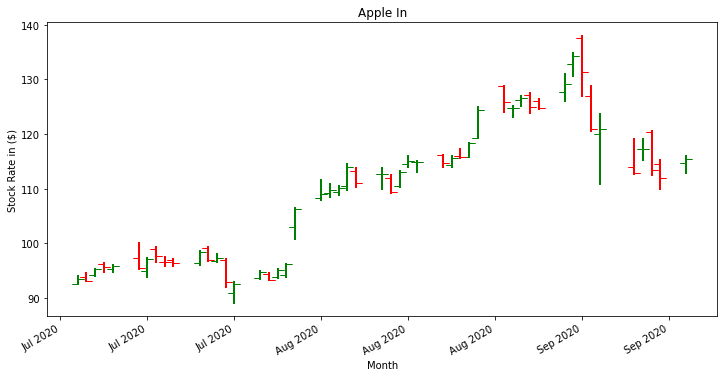

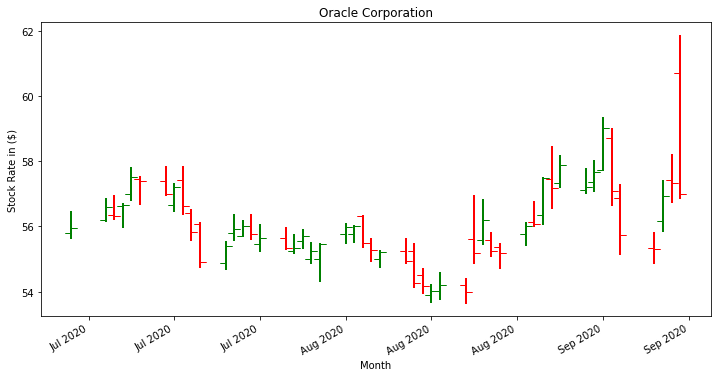

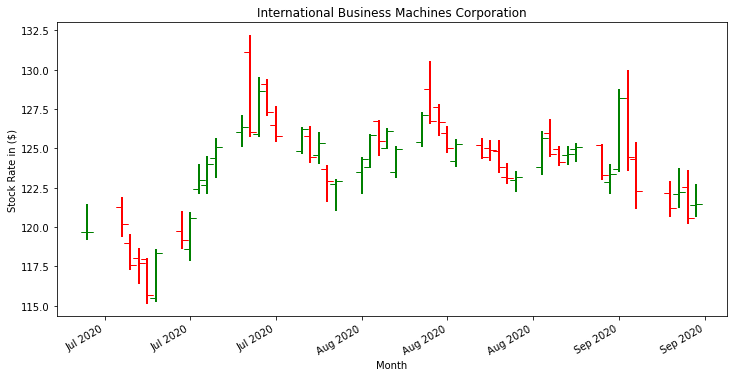

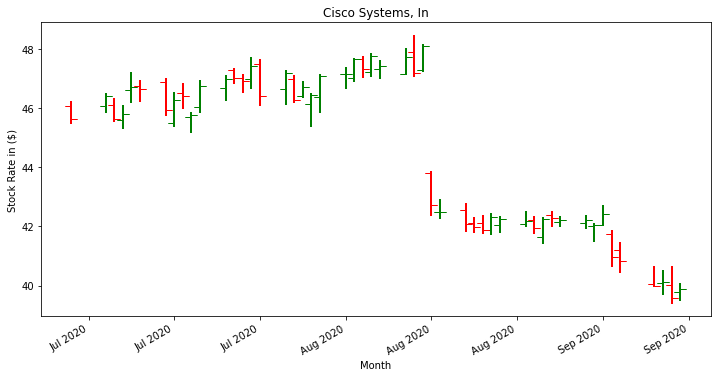

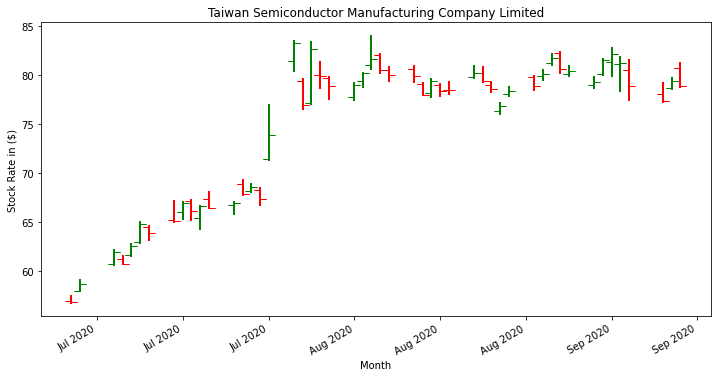

In [442]:
_dtarray = ['Apple Inc..csv','Oracle Corporation.csv', 'International Business Machines Corporation.csv', 'Cisco Systems, Inc..csv','Taiwan Semiconductor Manufacturing Company Limited.csv']
for _each_file in _dtarray:
    _datafile = _each_file
    _company_name = _datafile.strip('.csv')
    data = pd.read_csv(_datafile, index_col = 'Date')
    data.index = pd.to_datetime(data.index)
    dvalues = data[['Open', 'High', 'Low', 'Close']].values.tolist()
    pdates = mdates.date2num(data.index)
    ohlc = [ [pdates[i]] + dvalues[i] for i in range(len(pdates)) ]
    fig, ax = plt.subplots(figsize = (12,6))

    mplf.plot_day_summary_ohlc(ax, ohlc[-50:], ticksize = 6,colorup='green', colordown='red')
    

    ax.set_xlabel('Month')
    ax.set_ylabel('Stock Rate in ($)')
    ax.set_title(_company_name)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    fig.autofmt_xdate()

Alibaba Group Holding Limited
Microsoft Corporation
Alphabet In
Baidu, In
Facebook, In


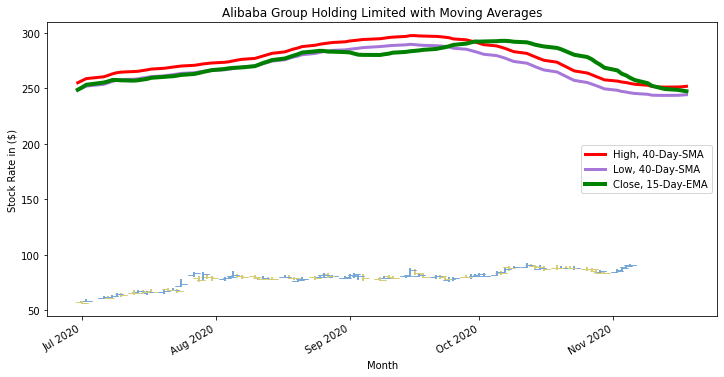

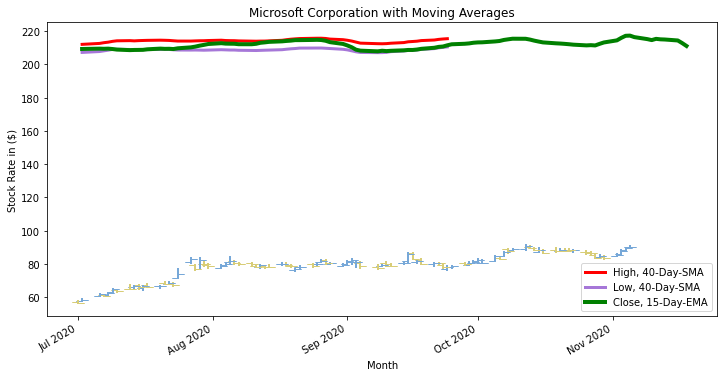

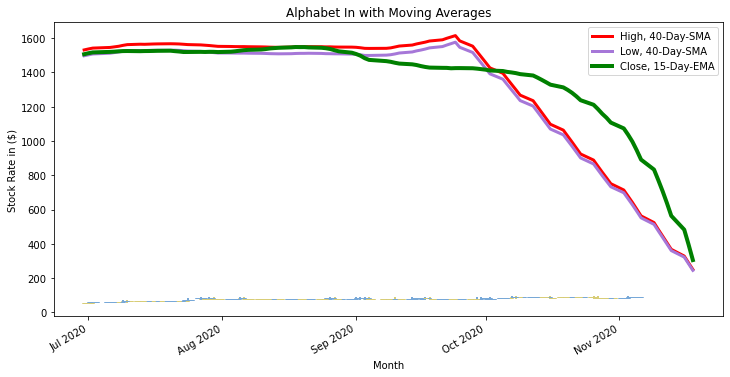

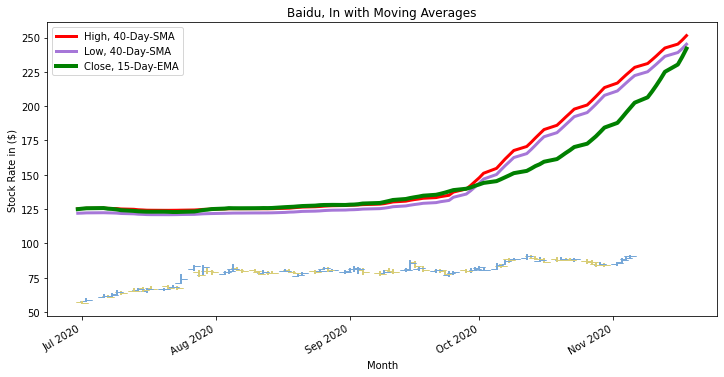

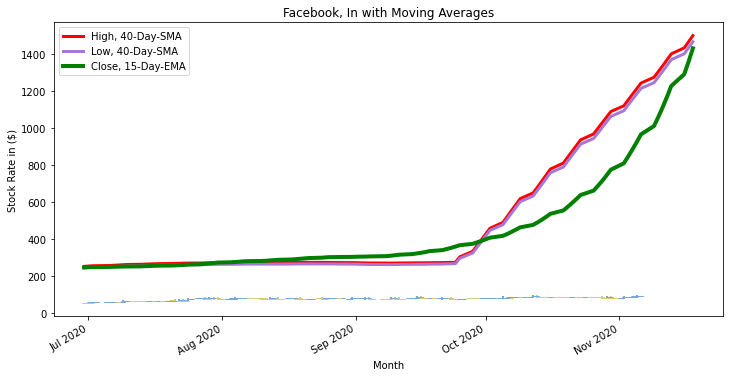

In [444]:
dtarray = ['Alibaba Group Holding Limited.csv','Microsoft Corporation.csv', 'Alphabet Inc..csv', 'Baidu, Inc..csv','Facebook, Inc..csv']
for _each_file in dtarray:
    datafile = _each_file
    company_name = datafile.strip('.csv')
    print(company_name)
    data = pd.read_csv(datafile, index_col = 'Date')
    # Converting the dates from string to datetime format:
    data.index = pd.to_datetime(data.index)
    hsma40 = (data['High'].replace(',','', regex=True).astype(float)).rolling(40).mean()
    lsma40 = (data['Low'].replace(',','', regex=True).astype(float)).rolling(40).mean()
    ema15 = (data['Close'].replace(',','', regex=True).astype(float)).ewm(15).mean()

    fig, ax = plt.subplots(figsize = (12,6))

    mplf.plot_day_summary_ohlc(ax, ohlc[-90:], ticksize = 6, colorup='#77a8d8', colordown='#d8cd77')
    ax.plot(hsma40[-100:], color = 'red', linewidth = 3, label='High, 40-Day-SMA')
    ax.plot(lsma40[-100:], color = '#a677d8', linewidth = 3, label='Low, 40-Day-SMA')
    ax.plot(ema15[-100:], color = 'green', linewidth = 4, label='Close, 15-Day-EMA')

    ax.set_xlabel('Month')
    ax.set_ylabel('Stock Rate in ($)')
    ax.set_title(company_name + ' with Moving Averages')
    ax.legend()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    fig.autofmt_xdate()

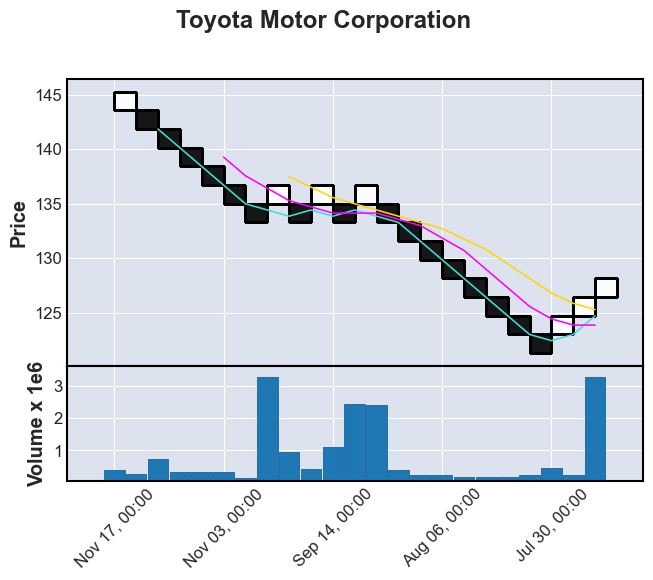

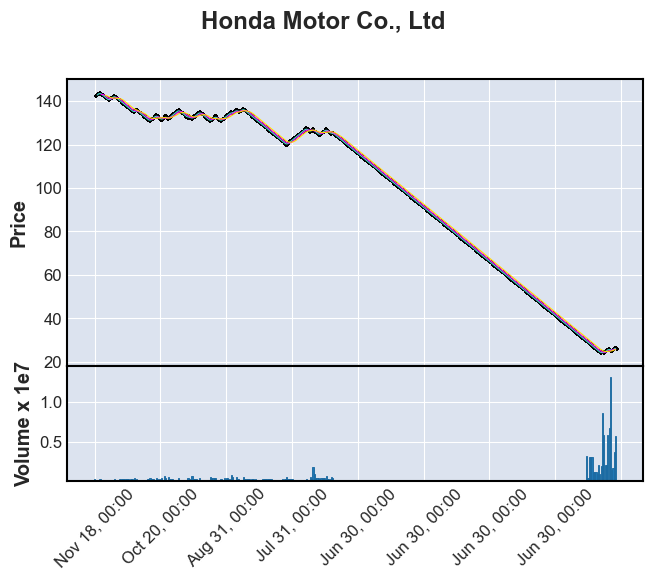

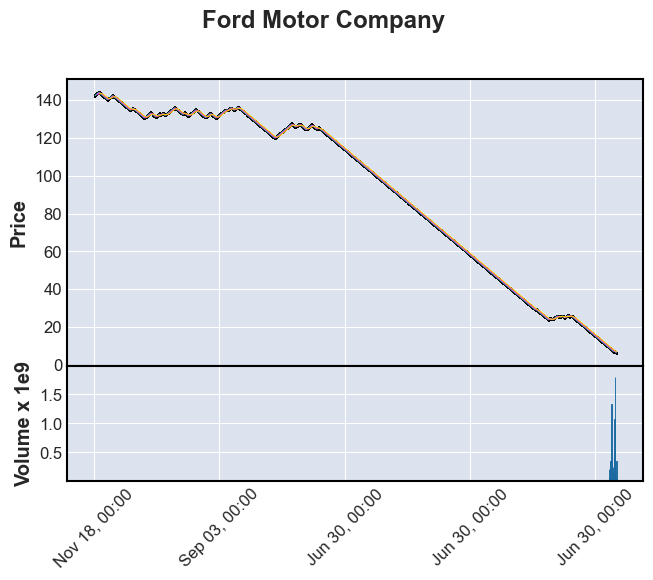

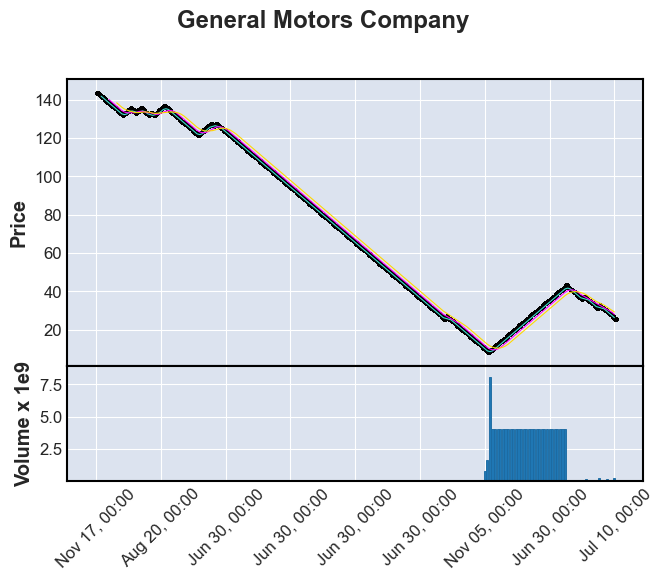

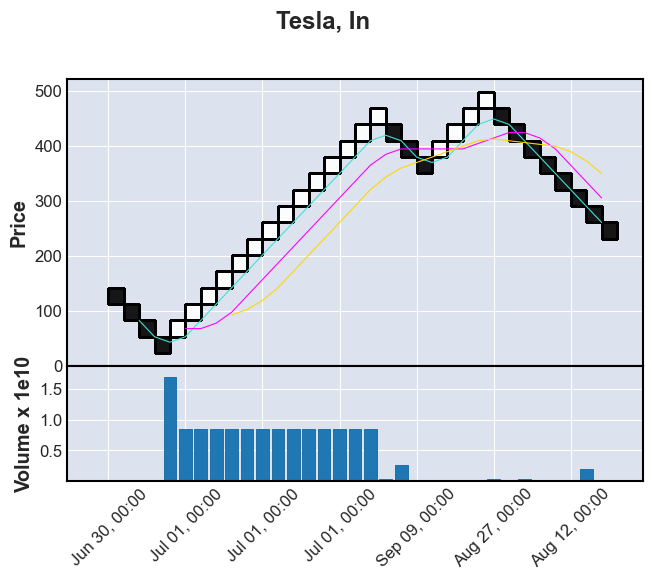

In [446]:
_dtarray = ['Toyota Motor Corporation.csv','Honda Motor Co., Ltd..csv', 'Ford Motor Company.csv', 'General Motors Company.csv','Tesla, Inc..csv']
for _each_file in _dtarray:
    _datafile = _each_file
    company_name = _datafile.strip('.csv')
    df = pd.read_csv(_datafile, index_col = 1,parse_dates=True)
    #daily.index.name = 'Date'
    df.shape
    mpf.plot(df.replace(',','', regex=True).astype(float), type='renko', mav = (3, 6, 9), volume = True,title=company_name)

    

In [667]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


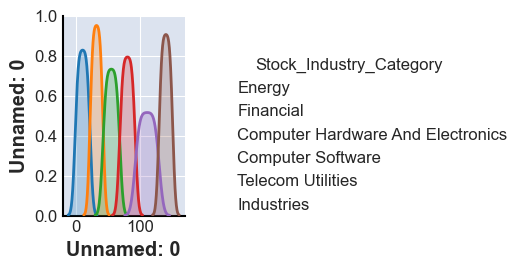

In [460]:
import seaborn as sns
df =  pd.read_csv("StocksData.csv")
sns.pairplot(df, hue="Stock_Industry_Category")

In [5]:
pip install bokeh

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: tornado>=5.1 in c:\users\sony\anaconda3\lib\site-packages (from bokeh) (6.0.4)



In [25]:
from bokeh.plotting import figure, output_notebook,show
df =  pd.read_csv("StocksData.csv")
df['Stock_Industry_Category']
my_list = list(set(df['Stock_Industry_Category']))
cat_list = list(df['Stock_Industry_Category'])
count_list = []
for i in my_list:
    count_list.append(cat_list.count(i))
    
factors = my_list
x= count_list

dot = figure(title = "Stock Industry Categories and Total Stocks", y_range = factors, x_range = [0,40])

dot.segment(0,factors, x, factors, line_width=2,line_color="green")
output_notebook()
show(dot)

Loading BokehJS ...

In [119]:
category_list = list(df['Stock_Industry_Category'])
stock_symbol_list = list(df['Stock_Symbol'])[0:24]
stock_price_list = list(df['Stock_Price($)'].replace(',','', regex=True).astype(float))[0:24]
plot = figure(title = "Stock Rates across Energy Industry",plot_height=250, x_range=stock_symbol_list)
plot.xaxis.axis_label = "Energy Company Stocks"
plot.yaxis.axis_label = "Stock Rate in ($)"
plot.y_range.start = 0
plot.y_range.end = max(stock_price_list)*1.1

plot.xaxis.major_label_orientation =1
plot.xgrid.grid_line_color = None
plot.vbar(x=stock_symbol_list,top=stock_price_list, width=0.9,color='red')

output_notebook()
show(plot)


stock_symbol_list = list(df['Stock_Symbol'])[25:44]
stock_price_list = list(df['Stock_Price($)'].replace(',','', regex=True).astype(float))[25:44]
plot = figure(title = "Stock Rates across Finance Industry",plot_height=250, x_range=stock_symbol_list)
plot.xaxis.axis_label = "Financial Company Stocks"
plot.yaxis.axis_label = "Stock Rate in ($)"
plot.y_range.start = 0
plot.y_range.end = max(stock_price_list)*1.1

plot.xaxis.major_label_orientation =1
plot.xgrid.grid_line_color = None
plot.vbar(x=stock_symbol_list,top=stock_price_list, width=0.9,color='blue')

output_notebook()
show(plot)

stock_symbol_list = list(df['Stock_Symbol'])[45:70]
stock_price_list = list(df['Stock_Price($)'].replace(',','', regex=True).astype(float))[45:70]
plot = figure(title = "Stock Rates across Hardware Industry",plot_height=250, x_range=stock_symbol_list)
plot.xaxis.axis_label = "Computer Hardware Industry"
plot.yaxis.axis_label = "Stock Rate in ($)"
plot.y_range.start = 0
plot.y_range.end = max(stock_price_list)*1.1

plot.xaxis.major_label_orientation =1
plot.xgrid.grid_line_color = None
plot.vbar(x=stock_symbol_list,top=stock_price_list, width=0.9,color='green')

output_notebook()
show(plot)

stock_symbol_list = list(df['Stock_Symbol'])[71:95]
stock_price_list = list(df['Stock_Price($)'].replace(',','', regex=True).astype(float))[71:95]
plot = figure(title = "Stock Rates across Hardware Industry",plot_height=250, x_range=stock_symbol_list)
plot.xaxis.axis_label = "Computer Software Industry"
plot.yaxis.axis_label = "Stock Rate in ($)"
plot.y_range.start = 0
plot.y_range.end = max(stock_price_list)*1.1

plot.xaxis.major_label_orientation =1
plot.xgrid.grid_line_color = None
plot.vbar(x=stock_symbol_list,top=stock_price_list, width=0.9,color='#3b1b42')

output_notebook()
show(plot)

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

In [11]:
category_list = list(df['Stock_Industry_Category'])
stock_symbol_list = list(df['Stock_Symbol'])[0:24]
stock_price_list = list(df['TRttm'].replace(',','', regex=True).astype(float))[0:24]
stock_price_list1 = list(df['TR2019'].replace(',','', regex=True).astype(float))[0:24]
stock_price_list2 = list(df['TR2018'].replace(',','', regex=True).astype(float))[0:24]
stock_price_list3 = list(df['TR2017'].replace(',','', regex=True).astype(float))[0:24]
stock_price_list4 = list(df['TR2016'].replace(',','', regex=True).astype(float))[0:24]

plot = figure(title = "Total Revenue across Energy Industry for each year",width=600,height=600, x_range=stock_symbol_list)

plot.xaxis.axis_label = "Energy Company Stocks"
plot.yaxis.axis_label = "Total Revenue in ($)"
plot.y_range.start = 0
plot.y_range.end = max(stock_price_list)*1.1

plot.xaxis.major_label_orientation =1
plot.xgrid.grid_line_color = None
s = plot.scatter(y=stock_price_list,x=stock_symbol_list, alpha=0.8,size=12,legend_label='TTRM')
s1 = plot.scatter(y=stock_price_list1,x=stock_symbol_list, alpha=0.8,size=12,color='red',legend_label='TR2019')
s2 = plot.scatter(y=stock_price_list2,x=stock_symbol_list, alpha=0.8,size=12,color='#3b1b42',legend_label='TR2018')
s3 = plot.triangle(y=stock_price_list3,x=stock_symbol_list, alpha=0.8,size=12,color='#031833',legend_label='TR2017')
s4 = plot.square(y=stock_price_list4,x=stock_symbol_list, alpha=0.8,size=12,color='#059e38',legend_label='TR2016')


output_notebook()
show(plot)




Loading BokehJS ...

In [20]:
from bokeh.models import ColumnDataSource
category_list = list(df['Stock_Industry_Category'])
x = list(df['Stock_Symbol'])[71:94]
y = list(df['GPttm'].replace(',','', regex=True).astype(float))[71:94]
y1 = list(df['GP2019'].replace(',','', regex=True).astype(float))[71:94]
y2 = list(df['GP2018'].replace(',','', regex=True).astype(float))[71:94]
stock_price_list3 = list(df['GP2017'].replace(',','', regex=True).astype(float))[71:94]
stock_price_list4 = list(df['GP2016'].replace(',','', regex=True).astype(float))[71:94]

source = ColumnDataSource(data=dict(
    x=x,
    y=y,
    y1=y1,
    y2=y2
))

p = figure(title='Software Industry Gross Profits across each year',plot_width=400, plot_height=400,y_range=(0,max(y)*1.1),x_range=x)
plot.xaxis.axis_label = "IT Company Names"
plot.yaxis.axis_label = "Profit in ($)"
p.xaxis.major_label_orientation =1
p.varea_stack(['y','y1', 'y2'], x='x', color=("blue","grey", "lightgrey"), source=source, legend_label=['GPTTM','GP2019','GP2018'])

output_notebook()
show(p)



Loading BokehJS ...

In [452]:
import numpy as np
from bokeh.layouts import gridplot
from bokeh.plotting import figure, output_file, show

x = list(df['Stock_Symbol'])[71:94]
y0 = list(df['TA2019'].replace(',','', regex=True).astype(float))[71:94]
y1 = list(df['TA2018'].replace(',','', regex=True).astype(float))[71:94]
y2 = list(df['TA2017'].replace(',','', regex=True).astype(float))[71:94]

s1 = figure(width=400, plot_height=400,x_range=x, y_range=(0,max(y0)*0.1), title=None)
s1.circle(x, y0, size=10, color="red", alpha=0.5)

s2 = figure(width=400, height=400, x_range=x, y_range=(0,max(y1)*0.1), title=None)
s2.triangle(x, y1, size=10, color="blue", alpha=0.5)

s3 = figure(width=400, height=400, x_range=x,y_range=(0,max(y2)*0.1), title=None)
s3.square(x, y2, size=10, color="black", alpha=0.5)

s1.xaxis.major_label_orientation =1

s2.xaxis.major_label_orientation =1

s3.xaxis.major_label_orientation =1
p = gridplot([[s1, s2, s3]], toolbar_location=None)

output_notebook()
show(p)

Loading BokehJS ...

In [76]:
import numpy as np
from bokeh.layouts import gridplot
from bokeh.plotting import figure, output_file, show

# prepare some data
x = list(df['Stock_Symbol'])[71:94]
y0 = list(df['GP2019'].replace(',','', regex=True).astype(float))[71:94]
y1 = list(df['GP2018'].replace(',','', regex=True).astype(float))[71:94]
y2 = list(df['GP2017'].replace(',','', regex=True).astype(float))[71:94]
print(y1)


TOOLS = "pan,wheel_zoom,box_zoom,reset,save,box_select"

p1 = figure(title="IT Software Companies", tools=TOOLS,x_range=x, y_range=(0,max(y1)*0.1),width=400, plot_height=400)
p1.line(x, y0, legend_label="GP2019)",line_dash=[4, 4], line_color="orange", line_width=2)
p1.line(x, y1, legend_label="GP2018",line_dash=[4, 4], line_color="red", line_width=2)
p1.line(x, y2, legend_label="GP2017",line_dash=[4, 4], line_color="blue", line_width=2)
p1.xaxis.major_label_orientation =1

# prepare some data
x = list(df['Stock_Symbol'])[43:68]
y0 = list(df['GP2019'].replace(',','', regex=True).astype(float))[43:68]
y1 = list(df['GP2018'].replace(',','', regex=True).astype(float))[43:68]
y2 = list(df['GP2017'].replace(',','', regex=True).astype(float))[43:68]
print(y1)

p2 = figure(title="Computer Hardware Industry", tools=TOOLS,x_range=x, y_range=(0,max(y1)*0.1),width=400, plot_height=400)
p2.line(x, y0, legend_label="GP2019",line_dash=[4, 4], line_color="orange", line_width=4)
p2.line(x, y1, legend_label="GP2018",line_dash=[4, 4], line_color="red", line_width=4)
p2.line(x, y2, legend_label="GP2017",line_dash=[4, 4], line_color="blue", line_width=4)
p2.xaxis.major_label_orientation =1

# prepare some data
x = list(df['Stock_Symbol'])[0:24]
y0 = list(df['GP2019'].replace(',','', regex=True).astype(float))[0:24]
y1 = list(df['GP2018'].replace(',','', regex=True).astype(float))[0:24]
y2 = list(df['GP2017'].replace(',','', regex=True).astype(float))[0:24]
print(y1)

p3 = figure(title="Energy Industry", tools=TOOLS,x_range=x, y_range=(0,max(y1)*0.1),width=400, plot_height=400)
p3.line(x, y0, legend_label="GP2019",line_dash=[4, 4], line_color="orange", line_width=4)
p3.line(x, y1, legend_label="GP2018",line_dash=[4, 4], line_color="red", line_width=4)
p3.line(x, y2, legend_label="GP2017",line_dash=[4, 4], line_color="blue", line_width=4)
p3.xaxis.major_label_orientation =1


# NEW: put the subplots in a gridplot
p = gridplot([[p1,p2,p3]], toolbar_location=None)

output_notebook()
show((p))

[46483000.0, 169915000.0, 50533000.0, 8364000.0, 17246000.0, 9831000.0, nan, 7716000.0, 7835009.0, 6287000.0, 4112000.0, 5617000.0, nan, 2077362.0, nan, 28403496.0, 1715096.0, nan, 2283900.0, 1760989.0, 7171000.0, 7114000.0, 602426000.0]
[98392000.0, 31511000.0, 36936000.0, 43737000.0, 32666000.0, 497874300.0, 15674000.0, 10669000.0, 10277000.0, 1835554000.0, 65953633.0, 5029200.0, 68200000.0, 2402491000.0, 10733000.0, 10702000.0, 4461000.0, nan, 4851000.0, 8446000.0, 6386000.0, 3752000.0, 172812000.0, 4233302.0, 2932000.0]
[582649000.0, 67733000.0, 44905000.0, 44875000.0, 488229000.0, 28880000.0, 44298000.0, 4337000.0, 7426000.0, 10954000.0, 140166000.0, 13212000.0, nan, 1351377.0, 7279000.0, 34067000.0, 12021783.0, nan, 18671000.0, 13731000.0, 12175000.0, 2986000.0, 4117000.0, nan]


Loading BokehJS ...

In [182]:
news_url = 'https://sg.news.yahoo.com/'
uClient = uReq(news_url)
page_html = uClient.read()
uClient.close()
page_soup = soup(page_html,"html.parser")


In [211]:
_lst = page_soup.findAll('a',attrs={'class':'nr-applet-nav-item'})
_links_list = []
for i in _lst:
    _links_list.append(i['href'])
news_url = 'https://sg.news.yahoo.com/'

['https://sg.news.yahoo.com',
 'https://sg.news.yahoo.com/singapore',
 'https://sg.news.yahoo.com/health/',
 'https://sg.news.yahoo.com/commentary',
 'https://sg.news.yahoo.com/esports/',
 'https://sg.news.yahoo.com/world/',
 'https://sg.news.yahoo.com/video/',
 'https://sg.news.yahoo.com/sports/',
 'https://sg.weather.yahoo.com/']

In [323]:
_news_list=[]
_news_list1=[]
_text_processing_list1=[]
def _get_urls(page_soup):
    _lst = page_soup.findAll('a',attrs={'class':'nr-applet-nav-item'})
    _links_list = []
    for i in _lst:
        _links_list.append(i['href'])
    return _links_list

def _nav_url(_url):
    uClient = uReq(news_url)
    page_html = uClient.read()
    uClient.close()
    page_soup = soup(page_html,"html.parser")
    return page_soup
    
def _scrap_url(_nav_details_soup,_category):
    _headlines_ = _nav_details_soup.findAll('div',attrs={'class':'Cf'})
    for i in _headlines_:
        _news_stories_dict = {}
        if(i.find('h3').find('a').text !=None):
            _news_stories_dict['StoryHeadlines'] = i.find('h3').find('a').text
            _text_processing_list1.append(i.find('h3').find('a').text)
            
        if(i.find('p')!=None):
            _news_stories_dict['Story_in_Detail'] = i.find('p').text
            _text_processing_list1.append(i.find('p').text)
        _news_stories_dict['Category'] = _category
        _news_list1.append(_news_stories_dict)
    return (_news_list)

def home_page_news_details():
    scrap_Url1 = 'https://sg.news.yahoo.com/'
    uClient1 = uReq(scrap_Url1)
    page_html1 = uClient1.read()
    uClient1.close()
    page_soup1 = soup(page_html1,"html.parser")
    _url_list = _get_urls(page_soup1)
    each_url = 'https://sg.news.yahoo.com'
    _nav_details_soup = _nav_url(each_url)
    _category = 'Live News'
    _scrap_url(_nav_details_soup,_category)
    
if __name__ == "__main__":
    home_page_news_details()
    print("NL:::-------------->",_news_list1)

each_url------------------- https://sg.news.yahoo.com
['Incoming Biden presidency exposes old French-German rift on defence', 'The German defence minister\'s warning against the "illusions" of pursuing European defence autonomy rattled French President Emmanuel Macron so much that her comments became a topic of discussion at a cabinet meeting this month in Paris.  In a robustly Atlanticist column published by Politico on Nov. 2, on the eve of the U.S. presidential election, Germany\'s Annegret Kramp-Karrenbauer said Europe would remain dependent on Washington for its defence for a long time to come.  Macron, a champion of European "strategic autonomy", said he was "in complete disagreement" with the German minister, arguing that the United States would only respect a Europe that was more self-reliant in defence.', 'Some Russian hospitals face shortages of COVID-19 drugs', "Some Russian hospitals are experiencing serious shortages of drugs used to treat COVID-19 and cannot restock becau

In [326]:
_news_list2=[]
_text_processing_list2=[]
def _get_urls(page_soup):
    _lst = page_soup.findAll('a',attrs={'class':'nr-applet-nav-item'})
    _links_list = []
    for i in _lst:
        _links_list.append(i['href'])
    return _links_list

def _nav_url2(_url2):
    uClient2 = uReq(_url2)
    page_html2 = uClient2.read()
    uClient2.close()
    page_soup2 = soup(page_html2,"html.parser")
    return page_soup2
    
def _scrap_url2(_nav_details_soup2,_category2):
    _headlines_ = _nav_details_soup2.findAll('div',attrs={'class':'Cf'})
    for i in _headlines_:
        _news_stories_dict2 = {}
        if(i.find('h3').find('a').text !=None):
            _news_stories_dict2['StoryHeadlines'] = i.find('h3').find('a').text
            _text_processing_list2.append(i.find('h3').find('a').text)
        if(i.find('p')!=None):
            _news_stories_dict2['Story_in_Detail'] = i.find('p').text
            _text_processing_list2.append(i.find('h3').find('a').text)
        _news_stories_dict2['Category'] = _category2
        _news_list2.append(_news_stories_dict2)
    
    return (_news_list2)

def home_page_news_details():
    _url2 = 'https://sg.news.yahoo.com/commentary'
    _nav_details_soup2 = _nav_url2(_url2)
    _category2 = 'Commentory'
    _scrap_url2(_nav_details_soup2,_category2)
    
if __name__ == "__main__":
    home_page_news_details()
    print("NL:::-------------->",_news_list2)

each_url------------------- https://sg.news.yahoo.com/commentary
['COMMENT: GE2020 – Singapore’s day of decision and the challenge of a generation', 'COMMENT: GE2020 – Singapore’s day of decision and the challenge of a generation', 'COMMENT: I miss physical rallies, but we had our fair share of fun this GE2020', 'COMMENT: I miss physical rallies, but we had our fair share of fun this GE2020', 'COMMENT: Now the circus is almost over, how do we vote?', 'COMMENT: Now the circus is almost over, how do we vote?', 'COMMENT: GE2020 — Why Singapore may lose, whatever the final score', 'COMMENT: GE2020 — Why Singapore may lose, whatever the final score', 'COMMENT: The dilemmas of a first-time voter', 'COMMENT: The dilemmas of a first-time voter', 'COMMENT: Low’s departure has accelerated the Workers’ Party’s transition - but at what cost?', 'COMMENT: Low’s departure has accelerated the Workers’ Party’s transition - but at what cost?', "COMMENT: PAP should clarify what it means by 'strong mandat

In [327]:
_news_list3=[]
_text_processing_list3=[]

def _get_urls(page_soup):
    _lst = page_soup.findAll('a',attrs={'class':'nr-applet-nav-item'})
    _links_list = []
    for i in _lst:
        _links_list.append(i['href'])
    return _links_list

def _nav_url3(_url3):
    uClient3 = uReq(_url3)
    page_html3 = uClient3.read()
    uClient3.close()
    page_soup3 = soup(page_html3,"html.parser")
    return page_soup3
    
def _scrap_url3(_nav_details_soup3,_category3):
    _headlines_ = _nav_details_soup3.findAll('div',attrs={'class':'Cf'})
    for i in _headlines_:
        _news_stories_dict3 = {}
        if(i.find('h3').find('a').text !=None):
            _news_stories_dict3['StoryHeadlines'] = i.find('h3').find('a').text
            _text_processing_list3.append(i.find('h3').find('a').text)
        if(i.find('p')!=None):
            _news_stories_dict3['Story_in_Detail'] = i.find('p').text
            _text_processing_list3.append(i.find('h3').find('a').text)
        _news_stories_dict3['Category'] = _category3
        _news_list3.append(_news_stories_dict3)
    
    return (_news_list3)

def home_page_news_details():
    _url3 = 'https://sg.news.yahoo.com/health/'
    _nav_details_soup3 = _nav_url3(_url3)
    _category3 = 'Health'
    _scrap_url3(_nav_details_soup3,_category3)
    
if __name__ == "__main__":
    home_page_news_details()
    print("NL:::-------------->",_news_list3)

each_url------------------- https://sg.news.yahoo.com/health/
['Greece: 2 private clinics appropriated to treat COVID-19', 'Greece: 2 private clinics appropriated to treat COVID-19', 'AP Photos: Spanish nurses witness grim solitude of COVID-19', 'AP Photos: Spanish nurses witness grim solitude of COVID-19', "News18 Afternoon Digest: Biden Announces US Will Rejoin WHO, India's Coronavirus Count Crosses 90 Lakh-mark and Other Top Stories", "News18 Afternoon Digest: Biden Announces US Will Rejoin WHO, India's Coronavirus Count Crosses 90 Lakh-mark and Other Top Stories", 'The Latest: Hong Kong to close more schools to fight virus', 'The Latest: Hong Kong to close more schools to fight virus', 'The Coronavirus Is Airborne Indoors. But We’re Still Scrubbing Surfaces.', 'The Coronavirus Is Airborne Indoors. But We’re Still Scrubbing Surfaces.', 'US curbs ramped up as emergency vaccine request to be filed', 'US curbs ramped up as emergency vaccine request to be filed', 'Study Claims People Ta

In [329]:
_news_list4=[]
_text_processing_list4=[]

def _get_urls(page_soup):
    _lst = page_soup.findAll('a',attrs={'class':'nr-applet-nav-item'})
    _links_list = []
    for i in _lst:
        _links_list.append(i['href'])
    return _links_list

def _nav_url4(_url4):
    uClient4 = uReq(_url4)
    page_html4 = uClient4.read()
    uClient4.close()
    page_soup4 = soup(page_html4,"html.parser")
    return page_soup4
    
def _scrap_url4(_nav_details_soup4,_category4):
    _headlines_ = _nav_details_soup4.findAll('div',attrs={'class':'Cf'})
    for i in _headlines_:
        _news_stories_dict4 = {}
        if(i.find('h3').find('a').text !=None):
            _news_stories_dict4['StoryHeadlines'] = i.find('h3').find('a').text
            _text_processing_list4.append(i.find('h3').find('a').text)
        if(i.find('p')!=None):
            _news_stories_dict4['Story_in_Detail'] = i.find('p').text
            _text_processing_list4.append(i.find('h3').find('a').text)
        _news_stories_dict4['Category'] = _category4
        _news_list4.append(_news_stories_dict4)
    
    return (_news_list4)

def home_page_news_details():
    _url4= 'https://sg.news.yahoo.com/esports/'
    _nav_details_soup4 = _nav_url4(_url4)
    _category4 = 'Esports'
    _scrap_url4(_nav_details_soup4,_category4)
    
if __name__ == "__main__":
    home_page_news_details()
    print("NL:::-------------->",_news_list4)

each_url------------------- https://sg.news.yahoo.com/esports/
['Reality Rift swop Valorant roster, citing age restrictions as a factor', 'Reality Rift swop Valorant roster, citing age restrictions as a factor', 'Resurgence rebrands to RSG following another successful year', 'Resurgence rebrands to RSG following another successful year', 'League of Legends pro Rekkles leaves Fnatic after 8 years', 'League of Legends pro Rekkles leaves Fnatic after 8 years', 'Why FIFA Ultimate Team is often hated and very successful', 'Why FIFA Ultimate Team is often hated and very successful', 'Weekly esports guide (16 - 23 November): FSL Dota 2, Valorant action and more', 'Weekly esports guide (16 - 23 November): FSL Dota 2, Valorant action and more', 'Cloud9 parts ways with Nisqy', 'Cloud9 parts ways with Nisqy', 'DRX release Chovy, Deft, Doran, and Keria', 'DRX release Chovy, Deft, Doran, and Keria', 'Vici Gaming release Eurus as Elephant-4AM partnership breaks down', 'Vici Gaming release Eurus as E

In [ ]:
_news_list4=[]
_text_processing_list4=[]

def _get_urls(page_soup):
    _lst = page_soup.findAll('a',attrs={'class':'nr-applet-nav-item'})
    _links_list = []
    for i in _lst:
        _links_list.append(i['href'])
    return _links_list

def _nav_url4(_url4):
    uClient4 = uReq(_url4)
    page_html4 = uClient4.read()
    uClient4.close()
    page_soup4 = soup(page_html4,"html.parser")
    return page_soup4
    
def _scrap_url4(_nav_details_soup4,_category4):
    _headlines_ = _nav_details_soup4.findAll('div',attrs={'class':'Cf'})
    for i in _headlines_:
        _news_stories_dict4 = {}
        if(i.find('h3').find('a').text !=None):
            _news_stories_dict4['StoryHeadlines'] = i.find('h3').find('a').text
            _text_processing_list4.append(i.find('h3').find('a').text)
        if(i.find('p')!=None):
            _news_stories_dict4['Story_in_Detail'] = i.find('p').text
            _text_processing_list4.append(i.find('h3').find('a').text)
        _news_stories_dict4['Category'] = _category4
        _news_list4.append(_news_stories_dict4)
    
    return (_news_list4)

def home_page_news_details():
    _url4= 'https://sg.news.yahoo.com/esports/'
    _nav_details_soup4 = _nav_url4(_url4)
    _category4 = 'Esports'
    _scrap_url4(_nav_details_soup4,_category4)
    
if __name__ == "__main__":
    home_page_news_details()
    print(_text_processing_list4)
    print("NL:::-------------->",_news_list4)

In [330]:
_news_list5=[]
_text_processing_list5=[]

def _get_urls(page_soup):
    _lst = page_soup.findAll('a',attrs={'class':'nr-applet-nav-item'})
    _links_list = []
    for i in _lst:
        _links_list.append(i['href'])
    return _links_list

def _nav_url5(_url5):
    uClient5 = uReq(_url5)
    page_html5 = uClient5.read()
    uClient5.close()
    page_soup5 = soup(page_html5,"html.parser")
    return page_soup5
    
def _scrap_url5(_nav_details_soup5,_category5):
    _headlines_ = _nav_details_soup5.findAll('div',attrs={'class':'Cf'})
    for i in _headlines_:
        _news_stories_dict5 = {}
        if(i.find('h3').find('a').text !=None):
            _news_stories_dict5['StoryHeadlines'] = i.find('h3').find('a').text
            _text_processing_list5.append(i.find('h3').find('a').text)
        if(i.find('p')!=None):
            _news_stories_dict5['Story_in_Detail'] = i.find('p').text
            _text_processing_list5.append(i.find('h3').find('a').text)
        _news_stories_dict5['Category'] = _category5
        _news_list5.append(_news_stories_dict5)
    
    return (_news_list5)

def home_page_news_details():
    _url5= 'https://sg.news.yahoo.com/world/'
    _nav_details_soup5 = _nav_url5(_url5)
    _category5 = 'World News'
    _scrap_url5(_nav_details_soup5,_category5)
    
if __name__ == "__main__":
    home_page_news_details()
    print("NL:::-------------->",_news_list5)


each_url------------------- https://sg.news.yahoo.com/world/
['New BTS album racks up millions of listens within hours', 'New BTS album racks up millions of listens within hours', 'Incoming Biden presidency exposes old French-German rift on defence', 'Incoming Biden presidency exposes old French-German rift on defence', 'Some Russian hospitals face shortages of COVID-19 drugs', 'Some Russian hospitals face shortages of COVID-19 drugs', 'Eric Trump’s Warning About Rudy Giuliani Taking Down ‘Dirtbags’ Backfires', 'Eric Trump’s Warning About Rudy Giuliani Taking Down ‘Dirtbags’ Backfires', "Jimmy Kimmel Stuns Barack Obama With An Absolutely Filthy 'Personal Question'", "Jimmy Kimmel Stuns Barack Obama With An Absolutely Filthy 'Personal Question'", 'China foreign minister to visit South Korea amid hopes for Xi trip, North Korea talks', 'China foreign minister to visit South Korea amid hopes for Xi trip, North Korea talks', 'Australia digests report of Afghan military killings', 'Australia

In [331]:
_news_list6=[]
_text_processing_list6=[]

def _get_urls(page_soup):
    _lst = page_soup.findAll('a',attrs={'class':'nr-applet-nav-item'})
    _links_list = []
    for i in _lst:
        _links_list.append(i['href'])
    return _links_list

def _nav_url6(_url6):
    uClient6 = uReq(_url6)
    page_html6 = uClient6.read()
    uClient6.close()
    page_soup6 = soup(page_html6,"html.parser")
    return page_soup6
    
def _scrap_url6(_nav_details_soup6,_category6):
    _headlines_ = _nav_details_soup6.findAll('div',attrs={'class':'Cf'})
    for i in _headlines_:
        _news_stories_dict6 = {}
        if(i.find('h3').find('a').text !=None):
            _news_stories_dict6['StoryHeadlines'] = i.find('h3').find('a').text
            _text_processing_list6.append(i.find('h3').find('a').text)
        if(i.find('p')!=None):
            _news_stories_dict6['Story_in_Detail'] = i.find('p').text
            _text_processing_list6.append(i.find('h3').find('a').text)
        _news_stories_dict6['Category'] = _category6
        _news_list6.append(_news_stories_dict6)
    
    return (_news_list6)

def home_page_news_details():
    _url6= 'https://sg.news.yahoo.com/singapore'
    _nav_details_soup6 = _nav_url6(_url6)
    _category6 = 'Singapore News'
    _scrap_url6(_nav_details_soup6,_category6)
    
if __name__ == "__main__":
    home_page_news_details()
    print("NL:::-------------->",_news_list6)


each_url------------------- https://sg.news.yahoo.com/singapore
['COVID-19: Singapore confirms 4 new cases; no local case for 10th straight day', 'COVID-19: Singapore confirms 4 new cases; no local case for 10th straight day', 'Man who allowed 15-year-old girls to smoke meth jailed', 'Man who allowed 15-year-old girls to smoke meth jailed', "Lee Suet Fern suspended 15 months by disciplinary body over handling of LKY's will", "Lee Suet Fern suspended 15 months by disciplinary body over handling of LKY's will", "Man charged for defacing Mother Mary statue wanted to 'beautify' her", "Man charged for defacing Mother Mary statue wanted to 'beautify' her", "Singtel launches anti-scam campaign urging public to 'jaga' their data", "Singtel launches anti-scam campaign urging public to 'jaga' their data", 'On The Mic: Keeping an independent cinema alive amid a pandemic', 'On The Mic: Keeping an independent cinema alive amid a pandemic', 'Teen who was high on meth slipped hand out of handcuffs, b

In [333]:
dataframes=[]

data = _news_list1
data1 = _news_list2
data3 = _news_list3
data4 = _news_list4
data5 = _news_list5
data6 = _news_list6

df1 = pd.DataFrame(data)
df2 = pd.DataFrame(data1)
df3 = pd.DataFrame(data3)
df4 = pd.DataFrame(data4)
df5 = pd.DataFrame(data5)
df6 = pd.DataFrame(data6)



df_all_rows = pd.concat([df1, df2, df3, df4, df5, df6])
df_all_rows.to_csv("YahooNews.csv")

In [334]:
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import plotly.express as px
import matplotlib.pyplot as plt
import squarify
from collections import Counter

In [454]:
#Reading the Scrapped data from the CSV File
import pandas as pd
df = pd.read_csv('YahooNews.csv',encoding='ISO-8859-1')

In [338]:
#Preprocessing the Story HeadLine data
def preprocess(StoryHeadlines):
    StoryHeadlines = StoryHeadlines.str.replace("(<br/>)", "")
    StoryHeadlines = StoryHeadlines.str.replace('(<a).*(>).*(</a>)', '')
    StoryHeadlines = StoryHeadlines.str.replace('(&amp)', '')
    StoryHeadlines = StoryHeadlines.str.replace('(&gt)', '')
    StoryHeadlines = StoryHeadlines.str.replace('(&lt)', '')
    StoryHeadlines = StoryHeadlines.str.replace('(\xa0)', ' ')  
    return StoryHeadlines

def preprocess(Story_in_Detail):
    Story_in_Detail = Story_in_Detail.str.replace("(<br/>)", "")
    Story_in_Detail = Story_in_Detail.str.replace('(<a).*(>).*(</a>)', '')
    Story_in_Detail = Story_in_Detail.str.replace('(&amp)', '')
    Story_in_Detail = Story_in_Detail.str.replace('(&gt)', '')
    Story_in_Detail = Story_in_Detail.str.replace('(&lt)', '')
    Story_in_Detail = Story_in_Detail.str.replace('(\xa0)', ' ')  
    return Story_in_Detail

df['Story_in_Detail'] = preprocess(df['Story_in_Detail'])
df['StoryHeadlines'] = preprocess(df['StoryHeadlines'])

In [378]:
#importing csv, stopwordss and Freqdist to find top 50 frequent words  and plottign them
import csv
from nltk.corpus import stopwords 
import nltk
import nltk, re, pprint
from nltk import word_tokenize
from nltk import FreqDist

lemmatized_sen=[] 
_main_list=[]
lemmatized_sen1=[] 
_main_list1=[]

headline_text = df['StoryHeadlines']

## Tokenizing
for sentence in headline_text:
    _token_list = word_tokenize(sentence)
    for _token in _token_list:
        _main_list.append(_token)
        
# Removing more punctuations to avoid it during bigram tagging
_tokenized_word_punc = []
for _each_word in _main_list:
    if(re.sub('[\W\_]','',_each_word)):
        _tokenized_word_punc.append(_each_word)

##Stop-words Removal:
stopwords = nltk.corpus.stopwords.words('english')
wordlist = [w for w in nltk.corpus.words.words('en') if w.islower()]
content = [_nonstop_word for _nonstop_word in _tokenized_word_punc if _nonstop_word.lower() in wordlist if _nonstop_word.lower() not in stopwords]
#print(content)

#Lemmatizing the Story headline corpus
_wordNetLemmt = nltk.WordNetLemmatizer()
lems = [_wordNetLemmt.lemmatize(_word) for _word in content]

    
    
headline_text1 = df['Story_in_Detail']

## Tokenizing
for sentence1 in headline_text1:
    if((sentence1!="" or sentence1!=None)):
        if(isinstance(sentence1, str)):
            print("dfgfd")
            _token_list1 = word_tokenize(sentence1)
            for _token1 in _token_list1:
                _main_list1.append(_token1)
print(_main_list1)
# Removing more punctuations to avoid it during bigram tagging
_tokenized_word_punc1 = []
for _each_word1 in _main_list1:
    if(re.sub('[\W\_]','',_each_word1)):
        _tokenized_word_punc1.append(_each_word1)
print(_tokenized_word_punc1)
##Stop-words Removal:
stopwords = nltk.corpus.stopwords.words('english')
wordlist = [w for w in nltk.corpus.words.words('en') if w.islower()]
content1 = [_nonstop_word1 for _nonstop_word1 in _tokenized_word_punc1 if _nonstop_word1.lower() in wordlist if _nonstop_word1.lower() not in stopwords]
print(content1)

#Lemmatizing the Story headline corpus
_wordNetLemmt1 = nltk.WordNetLemmatizer()
lems_word_sentence1 = [_wordNetLemmt1.lemmatize(_word1) for _word1 in content1]
print(lems_word_sentence1)


dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
dfgfd
['The', 'German', 'defence', 'minister', "'s", 'warning', 'against', 'the', '``', 'illusions', "''",

['German', 'defence', 'minister', 'warning', 'defence', 'autonomy', 'rattled', 'President', 'Macron', 'much', 'topic', 'discussion', 'cabinet', 'meeting', 'month', 'robustly', 'column', 'Politico', 'eve', 'presidential', 'election', 'said', 'would', 'remain', 'dependent', 'defence', 'long', 'time', 'come', 'Macron', 'champion', 'strategic', 'autonomy', 'said', 'complete', 'disagreement', 'German', 'minister', 'United', 'would', 'respect', 'defence', 'serious', 'used', 'treat', 'restock', 'panic', 'high', 'demand', 'new', 'system', 'said', 'Russia', 'world', 'number', 'like', 'many', 'struggling', 'cope', 'second', 'wave', 'disease', 'system', 'outside', 'close', 'breaking', 'point', 'dozen', 'face', 'big', 'antiviral', 'used', 'treat', 'three', 'local', 'three', 'told', 'China', 'foreign', 'minister', 'visit', 'next', 'week', 'South', 'foreign', 'ministry', 'said', 'amid', 'resume', 'bilateral', 'summit', 'diplomacy', 'nuclear', 'North', 'Wang', 'arrive', 'South', 'stay', 'meet', 'coun

[('said', 48), ('new', 22), ('government', 19), ('people', 17), ('Trump', 15), ('country', 14), ('China', 13), ('one', 13), ('million', 13), ('election', 12), ('report', 12), ('would', 11), ('world', 11), ('week', 11), ('Minister', 11), ('virus', 11), ('public', 11), ('minister', 10), ('President', 10), ('three', 10), ('ministry', 10), ('health', 10), ('official', 10), ('since', 10), ('man', 10), ('two', 10), ('told', 9), ('South', 9), ('senior', 9), ('even', 9), ('company', 9), ('first', 9), ('defence', 8), ('time', 8), ('second', 8), ('also', 8), ('Prime', 8), ('military', 8), ('capital', 8), ('state', 8), ('Hong', 8), ('former', 8), ('confirmed', 8), ('could', 8), ('Health', 8), ('pandemic', 8), ('journalist', 8), ('amid', 7), ('medium', 7), ('inquiry', 7)]


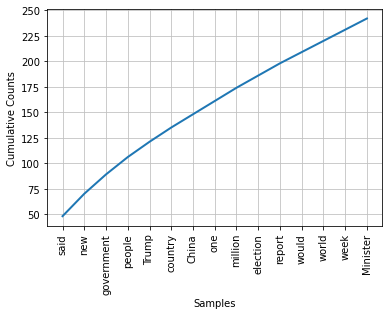

In [377]:
#Finding the freuently distributed words and plotting them            
fdist = nltk.FreqDist(lems_word_sentence1)
print(fdist.most_common(50))

## Plot Most Common 10 Words Used
fdist.plot(15, cumulative=True)

[('German', 'ADJ'), ('defence', 'NOUN'), ('minister', 'NOUN'), ('warning', 'VERB'), ('defence', 'NOUN'), ('autonomy', 'NOUN'), ('rattled', 'VERB'), ('President', 'NOUN'), ('Macron', 'NOUN'), ('much', 'ADJ'), ('topic', 'NOUN'), ('discussion', 'NOUN'), ('cabinet', 'NOUN'), ('meeting', 'VERB'), ('month', 'NOUN'), ('robustly', 'ADV'), ('column', 'VERB'), ('Politico', 'NOUN'), ('eve', 'VERB'), ('presidential', 'ADJ'), ('election', 'NOUN'), ('said', 'VERB'), ('would', 'VERB'), ('remain', 'VERB'), ('dependent', 'ADJ'), ('defence', 'NOUN'), ('long', 'ADJ'), ('time', 'NOUN'), ('come', 'VERB'), ('Macron', 'NOUN'), ('champion', 'NOUN'), ('strategic', 'ADJ'), ('autonomy', 'NOUN'), ('said', 'VERB'), ('complete', 'ADJ'), ('disagreement', 'ADJ'), ('German', 'ADJ'), ('minister', 'NOUN'), ('United', 'NOUN'), ('would', 'VERB'), ('respect', 'VERB'), ('defence', 'NOUN'), ('serious', 'ADJ'), ('used', 'VERB'), ('treat', 'NOUN'), ('restock', 'NOUN'), ('panic', 'ADJ'), ('high', 'ADJ'), ('demand', 'NOUN'), ('n

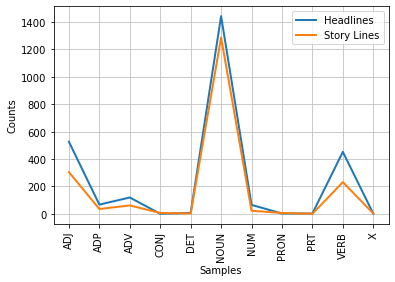

In [373]:
from nltk.probability import ConditionalFreqDist
## DETERMINE POS TAGGING:
_pos_tagged_words_headline = nltk.pos_tag(lems_word_sentence1,tagset='universal')
_pos_tagged_words_storydetail = nltk.pos_tag(lems,tagset='universal')
print(_pos_tagged_words_headline)
print(_pos_tagged_words_storydetail)

## DETERMINING CONDITIONAL FREQUENCY DIST::
_cfdist = ConditionalFreqDist()
for k,v in _pos_tagged_words_headline:
     _cfdist['Headlines'][v]+=1
for k,v in _pos_tagged_words_storydetail:
    _cfdist['Story Lines'][v]+=1
    
## PLOT C-DIST ON AGAINST EACH FILE
_cfdist.plot()

In [375]:
#Determining ## Collacations:
_collac_text = nltk.Text(content)
_collac_text.collocations(num=100,window_size=3)

#Determining ## Collacations:
_collac_text1 = nltk.Text(content1)
_collac_text1.collocations(num=100,window_size=3)

Lee Suet; fractious Lee; key driver; Clinic Last; Clinic Staff; Fern
disciplinary; Mother statue; Second leave; Second would; Staff Last;
Suet Fern; Teen high; Teen slipped; bit cop; body handling; defacing
Mother; disciplinary body; disciplinary handling; hand bit; hand cop;
high hand; high slipped; leave fractious; slipped bit; slipped hand;
would fractious; would leave; Fern suspended; Mary statue; Mother
Mary; Suet suspended; defacing Mary; suspended body; suspended
disciplinary; driver pandemic; key pandemic; Avoid Car; Bay
anniversary; Bay light; Borrow Home; Borrow Loan; Chronic Obstructive;
Chronic Pulmonary; Clark Duke; Duke Age; FOOD REVIEW; FOOD sit; Fed
stimulus; German maker; Government Losing; Government Since; Home
Loan; Kelly Clark; Kelly Duke; Marina Bay; Marina anniversary; Much
Borrow; Much Home; Murphy blowback; Murphy nation; Obstructive
Disease; Obstructive Pulmonary; Polish ruling; Princess controversial;
Princess enduringly; Pulmonary Disease; REVIEW indeed; REV

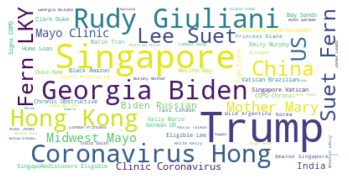

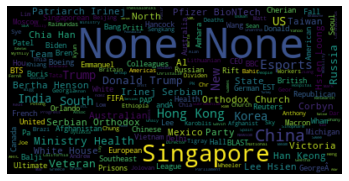

In [426]:
from nltk import word_tokenize, pos_tag, ne_chunk
from nltk import RegexpParser
from nltk import Tree


def _show_top50_frequent_words_wordcloud(_data):
    _head_line = df['StoryHeadlines'].apply(lambda _sent: _chunk_words_((_sent)))
    _head_line_string = _head_line.to_string()
    
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(_head_line_string)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    
def _show_top100_frequent_words_wordcloud(_data):
    _head_line = df['Story_in_Detail'].apply(lambda _sent: _chunk_words_((_sent)))
    _head_line_string = _head_line.to_string()
    
    wordcloud = WordCloud(max_font_size=50, max_words=200, background_color="black").generate(_head_line_string)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

#chunk and pos_tag to extract noun phrases
def _chunk_words_(_text, chunk_func=ne_chunk):
    if(isinstance(_text, str)):
        chunked = chunk_func(pos_tag(word_tokenize(_text)))
        chunk_words = []
        temp_chunk = []

        for subtree in chunked:
            if type(subtree) == Tree:
                temp_chunk.append(" ".join([token for token, pos in subtree.leaves()]))
            elif temp_chunk:
                named_entity = " ".join(temp_chunk)
                if named_entity not in chunk_words:
                    chunk_words.append(named_entity)
                    temp_chunk = []
            else:
                continue

        return chunk_words

_show_top50_frequent_words_wordcloud(df)
_show_top100_frequent_words_wordcloud(df)

In [387]:
## Check Polarity::
#Import Functions
from textblob import TextBlob, Word, Blobber
from textblob.classifiers import NaiveBayesClassifier
from textblob.taggers import NLTKTagger
df = df[~df['StoryHeadlines'].isnull()]
import cufflinks as cf1

#Preprocessing the Story Line data
def preprocess(StoryHeadlines):
    StoryHeadlines = StoryHeadlines.str.replace("(<br/>)", "")
    StoryHeadlines = StoryHeadlines.str.replace('(<a).*(>).*(</a>)', '')
    StoryHeadlines = StoryHeadlines.str.replace('(&amp)', '')
    StoryHeadlines = StoryHeadlines.str.replace('(&gt)', '')
    StoryHeadlines = StoryHeadlines.str.replace('(&lt)', '')
    StoryHeadlines = StoryHeadlines.str.replace('(\xa0)', ' ')  
    return StoryHeadlines

df['StoryHeadlines'] = preprocess(df['StoryHeadlines'])

#Getting the Sentiment Polarity of all the Story Line
df['polarity'] = df['StoryHeadlines'].map(lambda text: TextBlob(text).sentiment.polarity)

#Getting the length of story line
df['storyline_length'] = df['StoryHeadlines'].astype(str).apply(len)

#Getting the word count of the story line
df['word_count'] = df['StoryHeadlines'].apply(lambda x: len(str(x).split()))

print('5 random Headlines with positive sentiment polarity: \n')

cl = df.loc[df.polarity > 0, ['StoryHeadlines']].sample(5).values
for c in cl:
    print("\n",c[0])

print('5 random story line with negative sentiment polarity: \n')
cl = df.loc[df.polarity < 0, ['StoryHeadlines']].sample(5).values
for c in cl:
    print("\n",c[0])
    
## MArking the Polarity of +ves/-ves
#Importing cufflinks for plotting


cf1.go_offline()
cf1.set_config_file(offline=False, world_readable=True)

#Plotting the sentiment polarity distribution of the story line
df['polarity'].iplot(
    kind='hist',
    bins=50,
    color = "red",
    xTitle='polarity distribution',
    linecolor='black',
    yTitle='sentence count',
    title='Sentiment Polarity Distribution')

5 random Headlines with positive sentiment polarity: 


 Colleagues defend 'kind' UK minister Priti Patel over bullying report

 Rape, abuses in palm oil fields linked to top beauty brands

 Coronavirus LIVE Updates: Fresh Wave in Parts of India Dims Vaccine Cheer; Total Count Past 90 Lakh

 Tiffany Haddish, Dwayne 'The Rock' Johnson and Kevin Hart among celebrities directly impacted by the coronavirus

 Marina Bay Sands celebrates its 10th anniversary with light shows, shopping celebrations
5 random story line with negative sentiment polarity: 


 Jimmy Kimmel Stuns Barack Obama With An Absolutely Filthy 'Personal Question'

 Russia jails man for 13 years for trying to pass military secrets to CIA

 Mexico marks grim coronavirus milestone, passes 100,000 deaths

 Covid: Pizza worker's 'lie' forced South Australia lockdown

 Taxi to nowhere: virus measures hit London black cab business


In [388]:
#Plotting Head Line length Distribuation 
df['storyline_length'].iplot(
    kind='hist',
    bins=100,
    color = "blue",
    xTitle='Head Line length',
    linecolor='black',
    yTitle='text length count',
    title='Head line Text Length Distribution')

In [392]:
#Plotting Head line word count Distribuation across 155 movies
df['word_count'].iplot(
    kind='hist',
    bins=100,
    color = "green",
    xTitle="word count",
    linecolor='black',
    yTitle='count',
    title='Head line Text Word Count Distribution')

In [455]:
#Plotting Genre with story line word count for 155 movies
df['Category'].iplot(
    kind='line',
    xTitle='word count',
    linecolor='black',
    color = "#05179e",
    yTitle='Categories',
    title='Category Distribution with word count')

In [406]:
#storing the story line in a variable 
blob = TextBlob(str(df['StoryHeadlines']))
#Tagging Parts-of speech for story line corpus
pos_datadf = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_datadf = pos_datadf.pos.value_counts()
#plotting the pos-tag count for story line corpus
pos_datadf.iplot(
    kind='scatter',
    xTitle='POS tag element',
    yTitle='length',
    color = "#9e053d",
    title='POS tagging for HeadLine')

In [407]:
#Head lines text that has non English corpus
import scattertext as st
import spacy
nlp = spacy.load('en_core_web_sm')
from pprint import pprint

corpus = st.CorpusFromPandas(df, category_col='StoryHeadlines', text_col='StoryHeadlines', nlp=nlp).build()
print(list(corpus.get_scaled_f_scores_vs_background().index[:10]))

['superspreader', 'lky', 'covid', 'halia', 'instagram', 'croods', 'airpods', 'mnuchin', 'singaporediscovers', 'valorant']


In [412]:
from nltk.stem.snowball import SnowballStemmer
_stemmer = SnowballStemmer("english")
def _tokenize_and_stemming(_text):
    _tokens = [word for _sent in nltk.sent_tokenize(_text) for word in nltk.word_tokenize(_sent)]
    _filtered_tokens = []
    
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in _tokens:
        if re.search('[a-zA-Z]', token):
            _filtered_tokens.append(token)
    _stems = [_stemmer.stem(t1) for t1 in _filtered_tokens]
    return _stems


def _tokenize_only(_text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    _tokens = [word.lower() for _sent in nltk.sent_tokenize(_text) for word in nltk.word_tokenize(_sent)]
    _filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in _tokens:
        if re.search('[a-zA-Z]', token):
            _filtered_tokens.append(token)
    return _filtered_tokens


_totalvocab_stemmed = []
_totalvocab_tokenized = []
for _each_text in headline_text:
    _allwords_stemmed = _tokenize_and_stemming(i) #for each item in 'Story Line', tokenize/stem
    _totalvocab_stemmed.extend(_allwords_stemmed) #extend the 'totalvocab_stemmed' list
    
    _allwords_tokenized = _tokenize_only(_each_text)
    _totalvocab_tokenized.extend(_allwords_tokenized)

In [425]:
from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.4, max_features=200000,
                                 min_df=0, stop_words='english',
                                 use_idf=True, tokenizer=_tokenize_and_stemming, ngram_range=(1,3))

tfidf_matrix = tfidf_vectorizer.fit_transform(headline_text) #fit the vectorizer to Story Line

print(tfidf_matrix.shape)

C:\Users\sony\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.



(402, 3019)
